# Проект: Статистический анализ данных

В нашем распоряжении данные о некоторых пользователях из нескольких городов, а также об их поездках популярного сервиса аренды самокатов GoFast. Нам необходимо провести анализ данных и проверить некоторые гипотезы, которые помогут сервису в дальнейшем развитии их бизнеса.

1. Проанализируем данные о пользователях и их поездках:
    * частота встречаемости городов,
    * соотношение пользователей с подпиской и без подписки,
    * возраст пользователей,
    * расстояние, которое пользователь преодолел за одну поездку,
    * продолжительность поездок.
    
2. Подсчитаем выручку.

3. Проверим гипотезы:
    * Пользователи с подпиской тратят больше времени на поездки.
    * Пользователи с подпиской за одну поездку проезжают расстояние, превышающее рекомендуемое расстояние для самоката.
    * Помесячная выручка выше от пользователей с подпиской чем выручка  от пользовтелей без подписки.
    * После обновления серверов компании, количество обращений в техподдержку ощутимо снизится.

4. Для отдела маркетинга необходимо будет выяснить:
    * какое минимальное количество промокодов во время проведения акции нужно разослать, чтобы вероятность не выполнить план была примерно 5%.
    * оценить вероятность того, что из 1 млн. разосланных push-уведомлений, его откроют не более 399.5 тыс. пользователей.

5. На основе полученных данных сделаем выводы и предоставим заказчику в удобном и понятном формате.

<a id="ogl"></a>
## Оглавление

* [Оглавление](#ogl)
* [Предустановки](#setup)
    * [Установка необходимых библиотек](#setup1)
    * [Установка необходимых настроек](#setup2)
    * [Создание необходимых функций для автоматизации исследования](#setup3)       
* [Загрузка данных и первое знакомство с данными](#load_data)
    * [Загрузка данных](#load_data1)
    * [Первая информация по данным](#load_data2)
    * [Выводы](#load_data3)
* [Предобработка данных](#predobr_data)
    * [Датафрейм df_users_go](#predobr_data1)
        * [Столбец user_id](#predobr_data11)
        * [Столбец name](#predobr_data12)
        * [Столбец age](#predobr_data13)
        * [Столбец city](#predobr_data14)
        * [Столбец subscription_type](#predobr_data15)
    * [Датафрейм df_rides_go](#predobr_data2)
        * [Столбец distance](#predobr_data21)    
        * [Столбец duration](#predobr_data22)
        * [Столбец date](#predobr_data23)
    * [Датафрейм df_subscriptions_go](#predobr_data3)
        * [Столбец subscription_type](#predobr_data31)
    * [Объединение датафреймов](#predobr_data4)
    * [Выводы](#predobr_data5)
* [Исследовательский анализ данных](#analis_data)
    * [Частота встречаемости городов](#analis_data1)
        * [Выводы](#analis_data11)
    * [Соотношение пользователей с подпиской и без подписки](#analis_data2)
        * [Выводы](#analis_data21)
    * [Возраст пользователей](#analis_data3)
        * [Выводы](#analis_data31)
    * [Расстояние, которое пользователь преодолел за одну поездку](#analis_data4)
        * [Выводы](#analis_data41)
    * [Продолжительность поездок](#analis_data5)
        * [Выводы](#analis_data51)
    * [Скорость поездок](#analis_data6)
        * [Выводы](#analis_data61)
    * [Общие выводы по исследованию](#analis_data7)
* [Объединение данных](#merge_data)
    * [Выводы](#merge_data1)
* [Подсчет выручки](#calc_reven)
    * [Выводы](#calc_reven1)
* [Проверка гипотез](#check_hypot)
    * [Пользователи с подпиской тратят больше времени на поездки](#check_hypot1)
    * [Пользователи с подпиской за одну поездку проезжают расстояние, превышающее рекомендуемое расстояние для самоката](#check_hypot2)
    * [Помесячная выручка выше от пользователей с подпиской чем выручка  от пользовтелей без подписки](#check_hypot3)
    * [После обновления серверов компании, количество обращений в техподдержку ощутимо снизится](#check_hypot4)
    * [Выводы](#check_hypot5)
    
* [Распределения](#raspr)
    * [Количество промокодов при проведении акции](#raspr1)
        * [Вывод](#raspr11)
    * [Оценка вероятности открытия уведомления не более 399.5 тыс. пользователями из 1 млн.](#raspr2)
        * [Вывод](#raspr21)        
* [Общий вывод по исследованию](#conclusion_project)

<a id="setup"></a>
## Предустановки

<a id="setup1"></a>
### Установка необходимых библиотек

In [1]:
# установим необходимые библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
from scipy.stats import norm, binom
import random
import re
import matplotlib.pyplot as plt
import seaborn as sns

<a id="setup2"></a>
### Создание необходимых настроек

In [2]:
# запрет вывода больших чисел в научной нотации и разрешение выводить два десятичных знака после запятой
pd.set_option('display.float_format', '{:.2f}'.format)
# установим стиль отображения графика
sns.set(style='white')

<a id="setup3"></a>
### Создание необходимых функций для автоматизации исследования

In [3]:
# функция вывода основных данных по датафрейму
def first_data(data):
    print('Первые 5 строк датафрейма:')      
    display(data.head())
    print()
    print('Общая информамия по каждому столбцу датафрейма:')
    display(
        pd.DataFrame({
        'count': data.count(), 
        'count_isna': data.isna().sum(),
        'nunique': data.nunique(),    
        'min': data.min(),
        'max': data.max(),
        'Dtype':data.dtypes
                       }).sort_values('count'))
    print(f'Количесвтво строк-дубликатов в датафрейме: {data.duplicated().sum()}')

In [4]:
# функция вывода количества и процентного отношения данных
def value_perc(data, column, table=True):        
    df_value = data[column].value_counts().reset_index().rename(columns={'index': f"{column}", f"{column}": 'value'})
    df_value['perc_val'] = df_value['value'] / df_value['value'].sum() * 100
    if table:
        display(df_value)
    return df_value

In [5]:
# построение гистограммы и диаграммы разброса
def histogram_boxplot_graph(data, column, bins=10, descr=True):
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    data[column].hist(bins=bins, ax=axs[0])
    fig.suptitle(f'Распределение значений столбца {column}')
    axs[0].set_xlabel('Интервалы значений')
    axs[0].set_ylabel('Кол-во значений в интервалах')
    
    data.boxplot(column=column, ax=axs[1], medianprops=dict(color='red'))
    axs[1].set_xlabel('Интервалы значений')
    axs[1].set_ylabel('Распределение данных')
    if descr:
        display(data[column].describe().reset_index())

In [6]:
# функция формирования гистограммы
def histogramm(data, column, bins=10, descr=True):
    fig = plt.subplots(figsize=(10, 6))
    data[column].hist(bins=bins)
    plt.title(f'Распределение значений столбца {column}')
    plt.xlabel('Интервалы всех значений')
    plt.ylabel('Кол-во значений в интервалах')
    
    display(data[column].describe().reset_index())

In [7]:
# построение bar графиков, кроме расстояний и дистанций
def bar_graph(data, xcolumn=None, ycolumn=None, title=None, xlabel=None, ylabel=None, table=True):
        
    colors = ['green', 'blue']
    if xcolumn is None and ycolumn is not None:
        column = ycolumn
        y = data[column].value_counts().index
        x = data[column].value_counts()        
    elif xcolumn is not None and ycolumn is None:
        column = xcolumn
        x = data[column].value_counts().index
        y = data[column].value_counts() 
    else:
        x = data[xcolumn]
        y = data[ycolumn]
    fig = plt.figure(figsize=(10, 4))
    #прописываем название графика и его осей
    plt.title(title)
    ax = sns.barplot(x=x,y=y, color=random.choice(colors), alpha=0.6)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # Сетка только для оси Y
    ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
    # Отключить сетку для оси X
    ax.xaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
    if table:
        value_perc(data, column)

In [8]:
# функция для расчета подписок в городах
def subscription_city(data, title=None, xlabel=None):
    df_sbsct_city = data.pivot_table(index='city', columns='subscription_type', aggfunc='size')
    df_sbsct_city.columns = ['free', 'ultra']
    df_sbsct_city['pers'] = df_sbsct_city['ultra'] / (df_sbsct_city['free'] + df_sbsct_city['ultra']) * 100
    df_sbsct_city = df_sbsct_city.sort_values('pers', ascending=False).reset_index()
    bar_graph(df_sbsct_city, xcolumn='pers', ycolumn='city', title=title, xlabel=xlabel, ylabel='Города', table=False)
    display(df_sbsct_city)

In [9]:
# построение bar графиков для расстояний и дистанций
def dist_dur_graph(data, xgroup, col_agg, title='', xlabel='', ylabel='', kind='bar'):
    
    dic_lab = {
        'city': -0.1,
        'subscription_type': -0.4
    }
    if not xgroup or not col_agg:
        print('Проверьте параметры xgroup и col_agg!')
        return

    df_dist = (data.groupby(xgroup)[col_agg]
                .agg(['mean', 'max'])
                .reset_index()
                .sort_values('mean'))
    display(df_dist)
    fig, ax = plt.subplots(figsize=(12, len(df_dist)))
    df_dist.plot(x=xgroup, y=['mean', 'max'], kind=kind, ax=ax)
    ax.axvline(data[col_agg].median(), color='red', linestyle='--', label='Медианное значение всех поездок')
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    ax.xaxis.grid(True, linestyle='--')
    ax.yaxis.grid(False)
    ax.legend(["Общее медианное значение", "Среднее", "Максимум"], loc='upper center', bbox_to_anchor=(0.5, dic_lab[xgroup]), ncol=3)

In [10]:
# гистограммы по подпискам
def hist_dist_subscr(data, column, bins=10, descr=True):
    dic_lab = {
        'duration': ['Время, (мин)', 'Графики распределения времени поездок от типа подписки'],
        'distance': ['Расстояние, (м)', 'Графики распределения расстояния поездок от типа подписки'],
        'sp_kmh': ['Скорость, (км/ч)', 'Графики распределения скорости поездок от типа подписки']
    }
    first_data = data[column].loc[data['subscription_type'] == 'ultra']
    second_data = data[column].loc[data['subscription_type'] == 'free']
    plt.figure(figsize=(10, 6))
    sns.histplot(first_data, bins=bins, label='Ultra', color='blue', alpha=0.6, edgecolor='black')
    sns.histplot(second_data, bins=bins, label='Free', alpha=0.6, edgecolor='black')
    plt.axvline(data[column].median(), color='red', linestyle='--', linewidth=2, label='Медиана всех поездок')
    plt.axvline(data[column].mean(), color='green', linestyle='--', linewidth=2, label='Среднее всех поездок')
    plt.grid(visible=True, which='both', linestyle='-', linewidth=0.7)
    plt.legend()
    plt.xlabel(dic_lab[column][0])
    plt.ylabel('Распределение значений')
    plt.title(dic_lab[column][1]);
    
    df_all_subscr = data[column].describe().reset_index().set_index('index')
    df_free_subscr = data[column].loc[data['subscription_type'] == 'free'].describe().reset_index().set_index('index')
    df_ultra_subscr = data[column].loc[data['subscription_type'] == 'ultra'].describe().reset_index().set_index('index')
    desc_all_subscr = pd.concat([df_all_subscr, df_free_subscr, df_ultra_subscr], axis=1).reset_index()
    desc_all_subscr.columns = ['indicators', 'all', 'free', 'ultra']
    display(desc_all_subscr)

In [11]:
# Создание круговой диаграммы
def pie_graph(data, category=None, title=None):
    data_for_graph = value_perc(data, category)
    plt.figure(figsize=(7, 7))
    plt.pie(data_for_graph['value'], labels=data_for_graph['subscription_type'], autopct='%1.1f%%', startangle=90)
    plt.title(title, fontsize=16)
    
    data_for_graph
        

In [12]:
# функция сравнения p-value
def p_value(result):
    # зададим уровень статистичесвкой значимости
    alpha = .05
    p_val = f'р-значение равно {result.pvalue},'
    if result.pvalue < alpha:    
        print(p_val,'отвергаем нулевую теорию.')
    else:
        print(p_val,'не отвергаем нулевую теорию.')

In [13]:
# функция объединения датафреймов
def df_megre(df_rides_go, df_users_go):
    df_all_data = df_rides_go.merge(df_users_go, on='user_id').reset_index()
    df_all_data['type_age'] = np.where(df_all_data['age'] < 20, 'до 19 лет',
                                  np.where(df_all_data['age'] < 36, '20 до 35 лет', 'старше 35 лет'))
    df_all_data['sp_kmh'] = 60 * df_all_data['distance'] / df_all_data['duration'] /1000
    
    return df_all_data

<a id="load_data"></a>
## Загрузка данных и первое знакомство с данными

В данном разделе проведем загрузку данных и первое знакомство с ними.

<a id="load_data1"></a>
### Загрузка данных

In [14]:
# выгружаем csv-файлы и формируем датафреймы (таблицу данных)
df_users_go = pd.read_csv('/datasets/users_go.csv')
df_rides_go = pd.read_csv('/datasets/rides_go.csv', parse_dates=['date'])
df_subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')

<a id="load_data2"></a>
### Первая информация по данным

In [15]:
# выведем случайные 5 строк датафрейма df_users_go
first_data(df_users_go)

Первые 5 строк датафрейма:


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra



Общая информамия по каждому столбцу датафрейма:


,count,count_isna,nunique,min,max,Dtype
user_id,1565,0,1534,1,1534,int64
name,1565,0,194,Агата,Ясмина,object
age,1565,0,29,12,43,int64
city,1565,0,8,Екатеринбург,Тюмень,object
subscription_type,1565,0,2,free,ultra,object


Количесвтво строк-дубликатов в датафрейме: 31


In [16]:
# выведем случайные 5 строк датафрейма df_rides_go
first_data(df_rides_go)

Первые 5 строк датафрейма:


,user_id,distance,duration,date
0,1,4409.92,25.60,2021-01-01
1,1,2617.59,15.82,2021-01-18
2,1,754.16,6.23,2021-04-20
3,1,2694.78,18.51,2021-08-11
4,1,4028.69,26.27,2021-08-28



Общая информамия по каждому столбцу датафрейма:


,count,count_isna,nunique,min,max,Dtype
user_id,18068,0,1534,1,1534,int64
distance,18068,0,18068,0.86,7211.01,float64
duration,18068,0,17974,0.50,40.82,float64
date,18068,0,364,2021-01-01 00:00:00,2021-12-30 00:00:00,datetime64[ns]


Количесвтво строк-дубликатов в датафрейме: 0


In [17]:
# выведем случайные 5 строк датафрейма df_subscriptions_go
first_data(df_subscriptions_go)

Первые 5 строк датафрейма:


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199



Общая информамия по каждому столбцу датафрейма:


,count,count_isna,nunique,min,max,Dtype
subscription_type,2,0,2,free,ultra,object
minute_price,2,0,2,6,8,int64
start_ride_price,2,0,2,0,50,int64
subscription_fee,2,0,2,0,199,int64


Количесвтво строк-дубликатов в датафрейме: 0


<a id="load_data3"></a>
### Выводы

При первом знакомстве с данными были обнаружены следующие ошибки:
1. **датафрейм  df_users_go:**
    * user_id. Из 1565 записей 1534 являются уникальными. Учитывая, что данные этого датафрейма состоят из клиентов сервиса, можно предположить, что какие-то клиенты продублировались. 
    * subscription_type. В этом столбце содержатся категориальные переменные, переведем столбцец в тип днных 'category'. Этот тип данных, занимает меньше памяти, а такие опреации как группировка, фильтрация или агрегация с таким типом данных как правило, занимают меньше времени. Все это способствует улучшению производительности и облегчает работу с данными. 
    * name и city. Столбцы более подробно на предмет корректности заполнения данных, будут проверены во время предобработки данных.
    * age. Тип данных соответствует значениям, минимумы и максимумы данного столбца не указывают на какие-то ошибки ввода данных.
    * Найдено строк-дубликатов: 31
2. **датафрейм df_rides_go:**
    * date, user_id, distance и duration вопросов не вызывают. Типы данных соответствуют значениям, минимумы и максимумы не указывают на какие-то ошибки ввода данных.
    * Строк-дубликатов в датафрейме не обнаружено
3. **датафрейм df_subscriptions_go:**
    * subscription_type. Поменять тип данных на 'category',
    * minute_price, start_ride_price и subscription_fee вопросов не вызывают. Типы данных соответствуют значениям,
    * Строк-дубликатов в датафрейме не обнаружено
    
Эти выводы основаны при первом знакомстве с данными. Углубленный анализ данных будет проведен во время предобработки данных.

<a id="predobr_data"></a>
## Предобработка данных

В разделе предобработки данных мы проведем детальный анализ на предмет дубликатов, выбросов и ошибок ввода, а затем подготовим данные для углубленного изучения и их интерпретации

<a id="predobr_data1"></a>
### Датафрейм df_users_go

<a id="predobr_data11"></a>
#### Столбец user_id

Проанализируем столбец на предмет дубликатов записей

In [18]:
# Выведем строки, где user_id дублируются
df_users_go.loc[df_users_go['user_id'].duplicated(keep=False)].sort_values('user_id').head(10)

,user_id,name,age,city,subscription_type
15,16,Амалия,27,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
42,43,Стефания,22,Омск,ultra
1539,43,Стефания,22,Омск,ultra
1563,47,Юрий,28,Тюмень,ultra
46,47,Юрий,28,Тюмень,ultra
1555,72,Никита,25,Москва,ultra
71,72,Никита,25,Москва,ultra
1549,108,Влада,29,Тюмень,ultra
107,108,Влада,29,Тюмень,ultra


Строки, где значения user_id совпадают, так же имеют идентичные показатели и по другим столбцам. Примечательно, что индексы у строк-дубликатов имеют значения, близкие к максимальным. Выведем на экран индексы строк-дубликатов, расположив их в порядке возрастания.

In [19]:
# выведем индексы строк-дубликатов на экран
df_users_go.loc[df_users_go['user_id'].duplicated(keep='first')].sort_index().index.tolist

<bound method IndexOpsMixin.tolist of Int64Index([1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544,
            1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555,
            1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564],
           dtype='int64')>

Все индексы строк-дубликатов расположились в конце таблицы. Удалим эти строки.

In [20]:
# выведем количество и процентное отношение строк, которые имеют полное совпадение по всем столбцам датафрейма
print(
    f'Количетво строк-дубликатов:\
 {df_users_go.duplicated().sum()}. Это\
 {round(df_users_go.duplicated().sum() / df_users_go.shape[0] * 100, 2)}% от общего числа данных')

# удалим строки-дубликаты
df_users_go = df_users_go.drop_duplicates()
# проверим результат удаления
print(f'Количество строк-дубликатов после их удаления: {df_users_go.duplicated().sum()}')

Количетво строк-дубликатов: 31. Это 1.98% от общего числа данных
Количество строк-дубликатов после их удаления: 0


<a id="predobr_data12"></a>
#### Столбец name

Теперь проверим столбец name на корректность написания имён. Проверим, что имена не содержат цифры или специальные символы, а так же начинаются с заглавной буквы, при этом все остальные буквы прописные

In [21]:
# проверим столбец name на корректность написания имён пользователей
[print(name) for name in df_users_go['name'].unique() if (
    bool(re.search(r'[\d\W]', name)) 
    or bool(re.fullmatch(r'[A-Z][a-z]*', name)))]

[]

Некорректно введенных имен пользователей нет. Из таблицы общей информации по датафрейму мы видим, что условно минимальное и максимальное значение в столбце name начинаются с заглавных букв. А значит, все имена написаны корректно и с точки зрения орфографии.

<a id="predobr_data13"></a>
#### Столбец age

Посмотрим на распределение данных столбца age

,index,age
0,count,1534.00
1,mean,24.90
2,std,4.57
3,min,12.00
4,25%,22.00
5,50%,25.00
6,75%,28.00
7,max,43.00


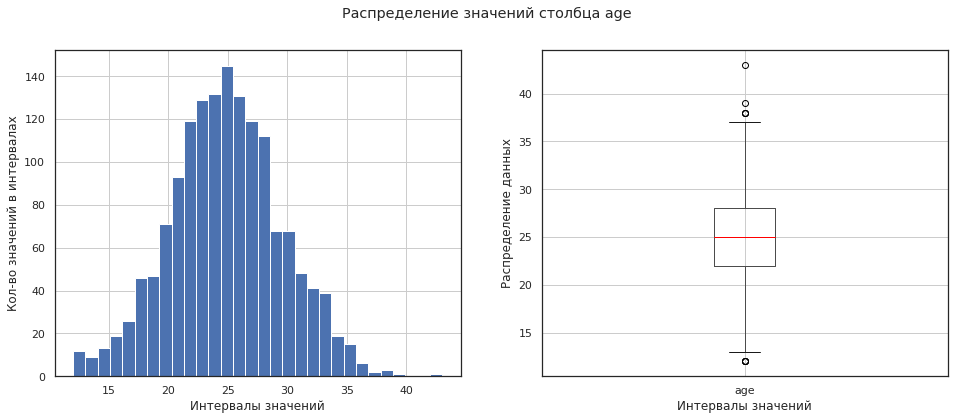

In [22]:
# посмотрим на графики
histogram_boxplot_graph(df_users_go, 'age', bins=30, descr=True)

Из графиков мы видим, что есть данные, которые выбиваются из общего ряда значений. Это пользователи, которым больше 40 лет. На гистограмме мы видим нормальное распределение данных. На это так же указывает таблица статистических данных. Разность медианного квартиля с 1-м и 3-м квартилями одинакова, медианное значение практически равно среднему. Учитывая неоходимость исследования по возрасту пользователей, ничего удалять здесь не будем. 

<a id="predobr_data14"></a>
#### Столбец city

Проверим столбец на скрытые дубликаты

In [23]:
# выведем список городов в алфавитном порядке 
[i for i in df_users_go['city'].sort_values().unique()]

['Екатеринбург',
 'Краснодар',
 'Москва',
 'Омск',
 'Пятигорск',
 'Ростов-на-Дону',
 'Сочи',
 'Тюмень']

В столбце city каких-либо ошибок ввода не обнаружено

<a id="predobr_data15"></a>
#### Столбец subscription_type

Сменим тип данных в столбце

In [24]:
# сменим тип данных
df_users_go['subscription_type'] = df_users_go['subscription_type'].astype('category')
# проверим тип данных столбца 
df_users_go['subscription_type'].dtype

CategoricalDtype(categories=['free', 'ultra'], ordered=False)

<a id="predobr_data2"></a>
### Датафрейм df_rides_go

<a id="predobr_data21"></a>
#### Столбец distance

Посмотрим на распределение данных столбца distance

,index,distance
0,count,18068.00
1,mean,3070.66
2,std,1116.83
3,min,0.86
4,25%,2543.23
5,50%,3133.61
6,75%,3776.22
7,max,7211.01


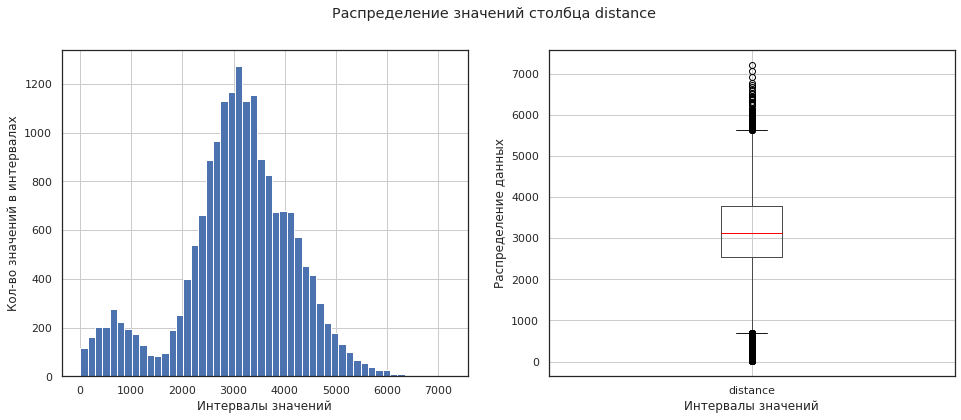

In [25]:
# выведем графики и таблицу
histogram_boxplot_graph(df_rides_go, 'distance', bins=50)

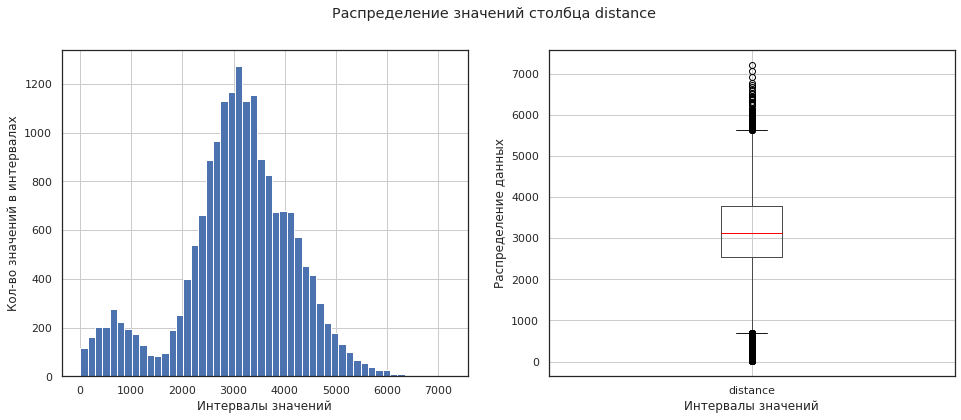

In [26]:
# выведем еще раз графики
histogram_boxplot_graph(df_rides_go, 'distance', bins=50, descr=False)

Условно, гистограмму можно разделить на две части: до 1500 метров и от 1500 до 6000 метров. Обе условных группы имеют близкое к нормальному распределение. Скорее всего, это указывает на то, что определенная часть пользователей предпочитает короткие поездки со средним значением около 700 метров, и есть основная часть пользователей, которые предпочитают поездки на кесколько километров.

<a id="predobr_data22"></a>
#### Столбец duration

,index,duration
0,count,18068.00
1,mean,17.81
2,std,6.09
3,min,0.50
4,25%,13.60
5,50%,17.68
6,75%,21.72
7,max,40.82


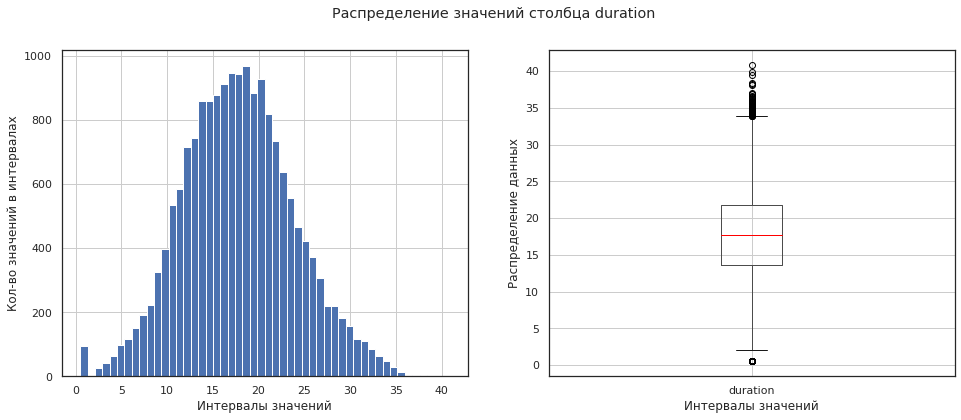

In [27]:
# выведем графики
histogram_boxplot_graph(df_rides_go, 'duration', bins=50, descr=True)

На графике виден выброс в районе 1 минуты. Посмотрим что это такое

In [28]:
# выведем данные с длинной поездки менее 1 минуты
df_rides_go[df_rides_go['duration'] < 1].sort_values('distance')

,user_id,distance,duration,date
15132,1325,4030.31,0.50,2021-12-22
17909,1524,4104.00,0.50,2021-06-18
10692,1006,4106.28,0.50,2021-10-31
9698,937,4169.07,0.50,2021-12-12
14342,1268,4177.14,0.50,2021-06-09
...,...,...,...,...
14574,1285,6316.57,0.50,2021-09-25
13701,1224,6414.52,0.50,2021-07-15
11385,1057,6601.20,0.50,2021-02-07
17242,1477,6724.93,0.50,2021-01-12


Из датафрейма мы видим, что есть 95 поездок с одинаковым временем 30 секунд и удивительным расстоянием от 4000 до 6000 метров. Очевидно, что с этими данными что-то не так. Попробуем выяснить причину. Для того, чтобы информация была более полной, объединим  датафреймы с интересующими нас строками

In [29]:
# объеденим таблицы и выведем данные
df_rides_go[(df_rides_go['duration'] < 1)].merge(df_users_go, on='user_id').reset_index()

,index,user_id,distance,duration,date,name,age,city,subscription_type
0,0,701,4196.45,0.50,2021-08-31,Иван,31,Екатеринбург,free
1,1,704,4830.82,0.50,2021-10-14,Мирон,29,Ростов-на-Дону,free
2,2,712,4684.00,0.50,2021-03-04,Дарья,28,Москва,free
3,3,713,5215.64,0.50,2021-02-25,Святослав,30,Краснодар,free
4,4,718,5197.44,0.50,2021-02-11,Владислава,31,Москва,free
...,...,...,...,...,...,...,...,...,...
90,90,1460,5531.34,0.50,2021-01-19,Жанна,27,Пятигорск,free
91,91,1477,6724.93,0.50,2021-01-12,Ян,17,Сочи,free
92,92,1483,4445.48,0.50,2021-03-06,Роберт,26,Екатеринбург,free
93,93,1496,5722.55,0.50,2021-02-14,Яна,19,Москва,free


In [30]:
# объеденим таблицы и выведем данные
df_rides_go[df_rides_go['duration'] < 1].merge(df_users_go, on='user_id').reset_index()\
.groupby(['city', 'subscription_type']).agg(
    cnt_age=('city', 'count'),
    med_dist =('distance', 'median'),
    med_dur=('duration', 'median'),
    min_date=('date', 'min'),
    max_date=('date', 'max')
)

cnt_age  med_dist  med_dur   min_date  \
city           subscription_type                                          
Екатеринбург   free                     9   5071.58     0.50 2021-01-05   
               ultra                    0       NaN      NaN        NaT   
Краснодар      free                    10   4737.04     0.50 2021-01-06   
               ultra                    0       NaN      NaN        NaT   
Москва         free                    14   5146.43     0.50 2021-02-07   
               ultra                    0       NaN      NaN        NaT   
Омск           free                    11   4835.93     0.50 2021-01-22   
               ultra                    0       NaN      NaN        NaT   
Пятигорск      free                    13   5353.19     0.50 2021-01-15   
               ultra                    0       NaN      NaN        NaT   
Ростов-на-Дону free                    17   4881.39     0.50 2021-01-08   
               ultra                    0       NaN      NaN        NaT   
Сочи           free                    11   5409.75     0.50 2021-01-12   
               ultra                    0       NaN      NaN        NaT   
Тюмень         free                    10   4856.42     0.50 2021-01-12   
               ultra                    0       NaN      NaN        NaT   

                                   max_date  
city           subscription_type             
Екатеринбург   free              2021-11-22  
               ultra                    NaT  
Краснодар      free              2021-12-22  
               ultra                    NaT  
Москва         free              2021-12-02  
               ultra                    NaT  
Омск           free              2021-11-27  
               ultra                    NaT  
Пятигорск      free              2021-12-23  
               ultra                    NaT  
Ростов-на-Дону free              2021-12-27  
               ultra                    NaT  
Сочи           free              2021-12-22  
               ultra                    NaT  
Тюмень         free              2021-12-20  
               ultra                    NaT

Объединяет все эти аномальные данные, отсутствие подписки у пользователей, поездки на дистанции от 4000 метров и время пользования 30 секунд. Аномальные данные присутствуют в разных городах и разнесены по датам в течение года. Вполне возможно, это какие-то промокоды, которые выдавались пользователям. А возможно какой-то технический сбой. В любом случае, их необходимо удалить, т.к. при дальнейшем исследовании они будут искажать данные.

In [31]:
print(f"Процент отобранной группы составляет \
{round(df_rides_go[df_rides_go['duration'] < 1].shape[0] / df_rides_go.shape[0] * 100, 2)}% от общего числа данных")

Процент отобранной группы составляет 0.53% от общего числа данных


Исходя из здравого смысла соотношения времени поездки и расстояния, эти данные аномальны, а значит либо о них не хватает каких-то дополнительных характеристик, либо в них присутствует ошибка. Исходя из этого мы не можем однозначно утверждать, поступала оплата от этих пользователей или нет. Следовательно, мы не можем рассчитывать выручку по этим поездкам, как минимум, на общих основаниях.

In [32]:
# удалим эти строки
df_rides_go.drop(df_rides_go[df_rides_go['duration'] < 1].index, inplace=True)

,index,duration
0,count,17973.00
1,mean,17.90
2,std,5.98
3,min,2.04
4,25%,13.67
5,50%,17.71
6,75%,21.75
7,max,40.82


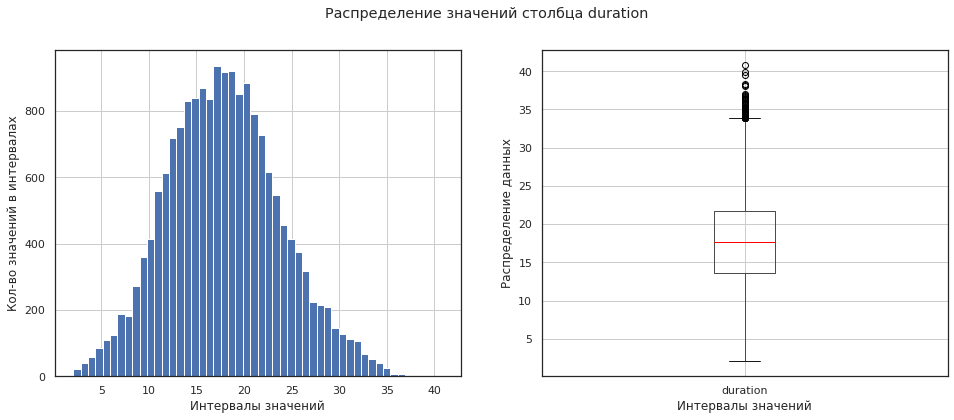

In [33]:
# выведем еще раз графики
histogram_boxplot_graph(df_rides_go, 'duration', bins=50, descr=True)

<a id="predobr_data23"></a>
#### Столбец date

In [34]:
# проверим столбец на присутствие всех дат
df_rides_go['date'].value_counts().reset_index()

,index,date
0,2021-12-22,70
1,2021-01-12,68
2,2021-12-27,68
3,2021-08-20,67
4,2021-06-09,66
...,...,...
359,2021-11-07,35
360,2021-07-30,35
361,2021-12-15,34
362,2021-02-02,33


Пропусков дат нет. Теперь добавим столбец с номером месяца.

In [35]:
# добавим в датафрейм df_rides_go столбец с месяцем
df_rides_go['month'] = df_rides_go['date'].dt.month
# или альтернативный вариант.
#df_rides_go['month'] = df_rides_go['date'].dt.to_period('m')
df_rides_go.sample(5)

,user_id,distance,duration,date,month
10974,1026,4364.51,13.07,2021-04-18,4
4944,532,3364.00,26.82,2021-12-21,12
5130,552,3738.57,18.81,2021-07-04,7
12276,1122,2226.27,19.42,2021-06-06,6
9364,913,2691.25,18.42,2021-04-08,4


<a id="predobr_data3"></a>
### Датафрейм df_subscriptions_go

<a id="predobr_data31"></a>
#### Столбец subscription_type

In [36]:
# сменим тип данных
df_subscriptions_go['subscription_type'] = df_subscriptions_go['subscription_type'].astype('category')
# проверим тип данных столбца 
df_subscriptions_go['subscription_type'].dtype

CategoricalDtype(categories=['free', 'ultra'], ordered=False)

Больше в этом датафрейме делать ничего не надо. В нем всего две строки. Типы данных соответствуют своим значениям, дубликатов нет

<a id="predobr_data5"></a>
### Выводы

1. **Датафрейм df_users_go**
     * В столбце user_id были удалены дубликаты данных (1.98% от общего числа данных),
     * Столбец name был проверен на корректность написания имен. Ошибок не обнаружено,
     * В столбце age были обнаружены выбросы данных, но было принято решение их не удалять, т.к. они пригодятся для исследования по возрасту пользователей,
     * Столбец city был проверен на неявные дубликаты и ошибки в данных. Ошибок не обнаружено,
     * В столбце subscription_type был изменен тип данных на тип category.
2. **Датафрейм df_rides_go**
    * В столбце distance были обнаружены выбросы данных, но было принято решение их не удалять, т.к. они пригодятся для исследования по возрасту пользователей,
    * В столбце duration были обнаружены выбросы данных, но было принято решение их не удалять, т.к. они пригодятся для исследования по возрасту пользователей. Так же были выявлены данные, которые могут исказить дальнейшие исследования. Было принято решение их удалить (0.53% от общего числа данных),
    * Столбец date был проверен на пропуски каких-либо дат. Дат, в которые бы отсутствовали поездки не обнаружено.
3. **Датафрейм df_subscriptions_go**
    * В столбце subscription_type был изменен тип данных на тип category.

<a id="analis_data"></a>
## Исселователький анализ данных

В этом разделе мы проведем исследование подготовленных данных. Интерпретируем и визуализируем их для последующего принятия решений.

<a id="analis_data1"></a>
### Частота встречаемости городов

Выведем график количества пользователей по городам

,city,value,perc_val
0,Пятигорск,219,14.28
1,Екатеринбург,204,13.30
2,Ростов-на-Дону,198,12.91
3,Краснодар,193,12.58
4,Сочи,189,12.32
5,Омск,183,11.93
6,Тюмень,180,11.73
7,Москва,168,10.95


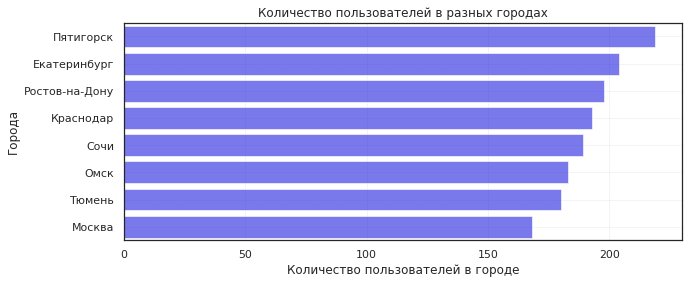

In [37]:
title = 'Количество пользователей в разных городах'
xlabel = 'Количество пользователей в городе'
ylabel = 'Города'
bar_graph(df_users_go, ycolumn='city', title=title, xlabel=xlabel, ylabel=ylabel)

Из графика "Количество пользователей в разных городах" мы видим, что городом с наибольшим количеством пользователей является Пятигорск. Тройку лидеров замыкают Екатеринбург и Ростов-на-Дону. Далее следуют Красчнодар, Сочи, Омск и Тюмень. Наименьшее количество пользователей зарегистрировано в Москве.

Теперь выведем график количества поездок в каждом городе

,city,value,perc_val
0,Пятигорск,2511,13.97
1,Екатеринбург,2452,13.64
2,Ростов-на-Дону,2433,13.54
3,Краснодар,2291,12.75
4,Сочи,2248,12.51
5,Тюмень,2111,11.75
6,Омск,2066,11.50
7,Москва,1861,10.35


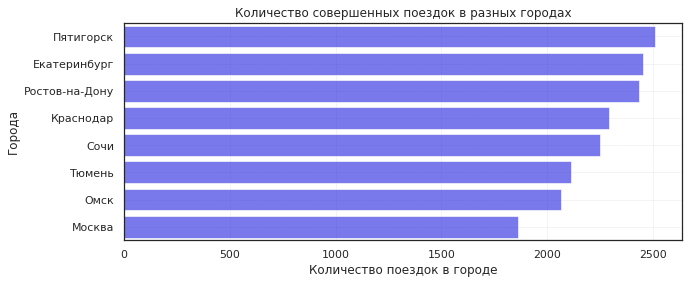

In [38]:
# выведем график количества поездок в каждом городе
title = 'Количество совершенных поездок в разных городах'
xlabel = 'Количество поездок в городе'
ylabel = 'Города'
bar_graph(df_megre(df_rides_go, df_users_go), ycolumn='city', title=title, xlabel=xlabel, ylabel=ylabel)

На графике "Количество совершенных поездок в разных городах" ситуация схожа с предыдущим графиком. Единственное отличие, это то, что Тюмень и Омск поменялись местами. Лидирует по прежнему Пятигорск, а на последнем месте Москва.

Теперь посмотрим на данные по активности пользователей по городам. Выыедем данные о медианном и среднем значениях поездок попользователям. Так же, для наглядности, добавим и общее количество поездок в каждом городе

In [39]:
# сгруппируем данные и выведем таблицу 
(
    df_megre(df_rides_go, df_users_go).groupby(['city', 'user_id']).size().reset_index(name='trip_count')
            .groupby('city').agg(
                            cnt_trip=('trip_count', 'sum'),
                            mean_trip=('trip_count', 'mean'),
                            med_trip=('trip_count', 'median'))
            .sort_values('mean_trip', ascending=False).reset_index()
)

,city,cnt_trip,mean_trip,med_trip
0,Ростов-на-Дону,2433,12.29,12
1,Екатеринбург,2452,12.02,12
2,Сочи,2248,11.89,12
3,Краснодар,2291,11.87,12
4,Тюмень,2111,11.73,12
5,Пятигорск,2511,11.47,11
6,Омск,2066,11.29,11
7,Москва,1861,11.08,11


<a id="analis_data11"></a>
#### Выводы

Пятигорск является лидером по количеству пользователей и поездок, однако, занимает лишь шестое место по активности пользователей. Москва по всем трем параметрам уверенно занимает последнее место. Наиболее сбалансированными городами являются Ростов-на-Дону и Екатеринбург. Эти города входят в тройку лидеров как по количеству пользователей и количеству поездок, так и по активности пользователей.

<a id="analis_data2"></a>
### Соотношение пользователей с подпиской и без подписки

Выведем данные с количеством и процентным соотношением пользователей по типу подписок

,subscription_type,value,perc_val
0,free,835,54.43
1,ultra,699,45.57


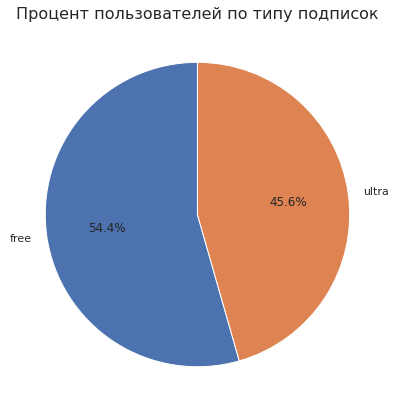

In [40]:
# выведем таблицу и круговую диаграмму процента пользователей по типу подписок
title = 'Процент пользователей по типу подписок'
pie_graph(df_users_go, category='subscription_type', title=title)

Выведем на экран данные с процентом подписок ultra по городам

,city,free,ultra,pers
0,Москва,84,84,50.00
1,Омск,92,91,49.73
2,Тюмень,98,82,45.56
3,Сочи,103,86,45.50
4,Екатеринбург,112,92,45.10
5,Ростов-на-Дону,109,89,44.95
6,Пятигорск,125,94,42.92
7,Краснодар,112,81,41.97


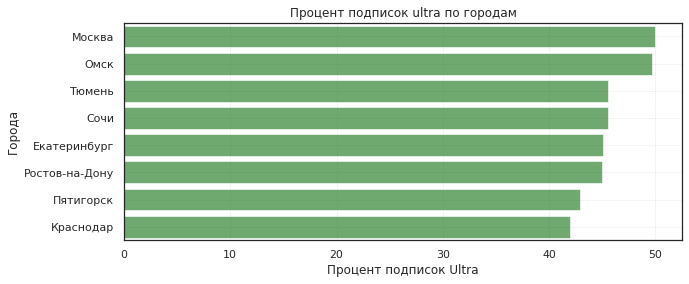

In [41]:
# выведем на экран данные
title = 'Процент подписок ultra по городам'
xlabel = 'Процент подписок Ultra'
ylabel = 'Города'
subscription_city(df_users_go, title=title, xlabel=xlabel)

Теперь посмотрим на данные количества поездок по типу подписки

,subscription_type,value,perc_val
0,free,11473,63.83
1,ultra,6500,36.17


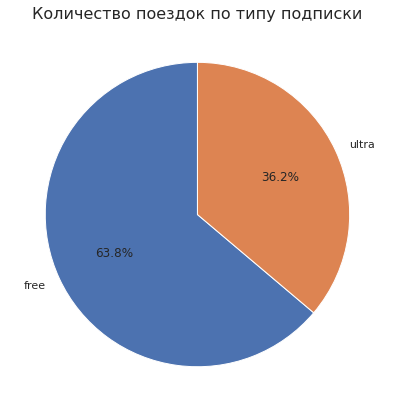

In [42]:
# выведем таблицу и круговую диаграмму количества поездок по типу подписки
title = 'Количество поездок по типу подписки'
pie_graph(df_megre(df_rides_go, df_users_go), category='subscription_type', title=title)

Выведем на экран данные поездок по подписке ultra, по городам

,city,free,ultra,pers
0,Омск,1239,827,40.03
1,Москва,1161,700,37.61
2,Ростов-на-Дону,1548,885,36.37
3,Тюмень,1344,767,36.33
4,Сочи,1435,813,36.17
5,Екатеринбург,1576,876,35.73
6,Краснодар,1511,780,34.05
7,Пятигорск,1659,852,33.93


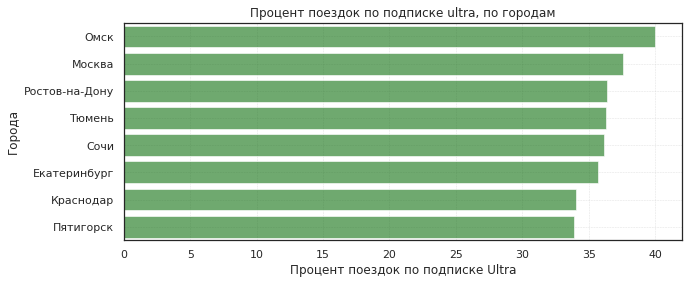

In [43]:
# выведем данные
title = 'Процент поездок по подписке ultra, по городам'
xlabel = 'Процент поездок по подписке Ultra'
subscription_city(df_megre(df_rides_go, df_users_go), title=title, xlabel=xlabel)

In [44]:
# выведем статистические данные по количеству поездок пользователей в зависимости от типа подписки
def value_trips_user_subscr(df_all_data):
    desc_trip_ultra = (
    df_all_data.loc[df_all_data['subscription_type'] == 'ultra'].groupby('user_id')['user_id'].count().reset_index(name='cnt')
    ['cnt'].describe().reset_index(name='ultra').set_index('index')
    )
    desc_trip_free = (
    df_all_data.loc[df_all_data['subscription_type'] == 'free'].groupby('user_id')['user_id'].count().reset_index(name='cnt')
    ['cnt'].describe().reset_index(name='free').set_index('index')
    )
    desc_all_trips = pd.concat([desc_trip_free, desc_trip_ultra], axis=1).reset_index()
    display(desc_all_trips)

value_trips_user_subscr(df_megre(df_rides_go, df_users_go))

,index,free,ultra
0,count,835.00,699.00
1,mean,13.74,9.30
2,std,3.71,3.19
3,min,4.00,2.00
4,25%,11.00,7.00
5,50%,13.00,9.00
6,75%,16.00,11.00
7,max,27.00,21.00


<a id="analis_data21"></a>
#### Выводы

На графике количества пользователей по типу подписки и в таблице мы видим, что 835 пользователей предпочитают пользоваться услугами без подписки (free) и 699 пользователей имеют подписку ultra. Разница относительно не большая. В процентном отношении это 55% на 45% соответственно. Однако, если посмотреть на таблицу и график "Количество поездок по типу подписки", мы видим, что разница между поездками, совершенными без подписки (free) и поездками по подписке ultra, значительно увеличивается 11473 против 6500 соответственно. В процентном отношении, это 63,8% против 36,2% соответственно.

Что же касается подписок по городам, то здесь примечателен тот факт, что по количеству подписок ultra лидируют те города, которые были аутсайдерами в исследовании по количеству пользователей сервиса и количеству совершенных ими поездок. Это Москва, Омск, Тюмень и Сочи.
Лидерами по количеству поездок по  подписке ultra так же являются Омск и Москва.

В данном исследовании определенными фаворитами являются города Омск и Москва. Самым же сбалансированным городом на основании двух исследований (частота встречаемости городов и соотношение пользователей с подпиской ultra и без подписки) является Ростов-на-Дону.

<a id="analis_data3"></a>
### Возраст пользователей

Посмотрим на график числа пользователей по возрасту

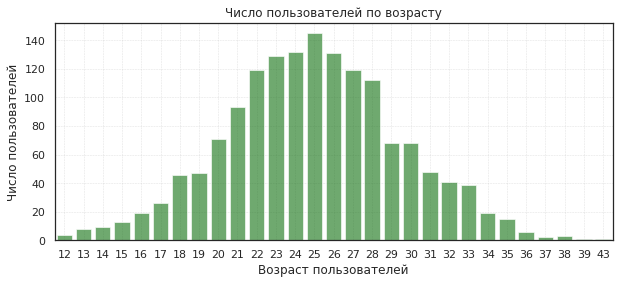

In [45]:
# выведем график числа пользователей по возрасту
title = 'Число пользователей по возрасту'
xlabel = 'Возраст пользователей'
ylabel = 'Число пользователей'
bar_graph(df_users_go, xcolumn='age', title=title, xlabel=xlabel, ylabel=ylabel, table=False)

Посмотрим на график и таблицу активности пользователей по возрасту

,age,value,perc_val
0,25,1761,9.80
1,26,1614,8.98
2,24,1489,8.28
3,23,1473,8.20
4,22,1388,7.72
5,27,1320,7.34
6,28,1311,7.29
7,21,1165,6.48
8,20,828,4.61
9,29,815,4.53


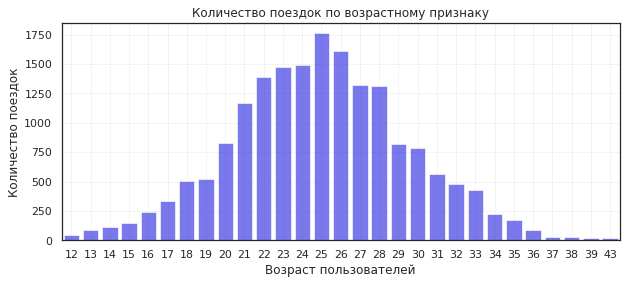

In [46]:
# выведем таблицу и график количества поездок по типу подписки
title = 'Количество поездок по возрастному признаку'
xlabel = 'Возраст пользователей'
ylabel = 'Количество поездок'
bar_graph(df_megre(df_rides_go, df_users_go), xcolumn='age', title=title, xlabel=xlabel, ylabel=ylabel, table=True)

Разделим пользователей на три возрастные группы: до 19 лет включительно, от 20 до 35 лет включительно и старше 36 лет. Так как в данном исследовании мы проводим общий анализ пользователей по возрасту, было решено разбить на три группы по психосоциальному развитию человека, а не на равные интервалы возраста пользователей или более мелкие возрастные группы.

Сформируем таблицу количества поездок и их процентного отношения от всех поездок по группе возраста

In [47]:
# выведем таблицу количества поездок по группе возраста
value_perc(df_megre(df_rides_go, df_users_go), 'type_age', table=False)    

,type_age,value,perc_val
0,20 до 35 лет,15805,87.94
1,до 19 лет,1996,11.11
2,старше 35 лет,172,0.96


<a id="analis_data31"></a>
#### Выводы

Проведя общий анализ возраста пользователей можно заключить, что наиболее активные, это пользователи, которым 25 лет (9,8% от всех поездок), 26 лет (9% от всех поездок) и 24 года (8,3% от всех поездок). Суммарно они составляют 27% от поездок всех пользователей. Что же касается группы пользователей по возрастному признаку, то здесь (что, в общем-то логично и предсказуемо) чуть меньше 88% составляют пользоваттели от 20 до 35 лет. При этом стоит отметить, что на графике "количество поездок по возрастному признаку" заметно сильное падение активности пользователей с 28 лет.

<a id="analis_data4"></a>
### Расстояние, которое пользователь преодолел за одну поездку

Посмотрим на распределение данных по расстоянию поездок

,index,distance
0,count,17973.00
1,mean,3059.86
2,std,1108.81
3,min,0.86
4,25%,2538.84
5,50%,3129.03
6,75%,3762.64
7,max,7066.00


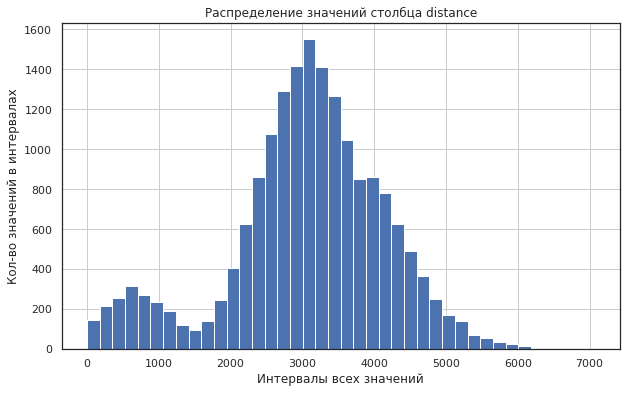

In [48]:
# выведем гистограмму распределения поездок
histogramm(df_megre(df_rides_go, df_users_go), column='distance', bins=40)

Рассчитаем расстояние, которое проезжают пользователи по разным городам

,city,mean,max
5,Ростов-на-Дону,2998.43,6671.97
3,Омск,3028.23,6395.40
6,Сочи,3041.88,6535.39
1,Краснодар,3045.93,6760.94
7,Тюмень,3066.95,7066.00
2,Москва,3085.03,6456.42
0,Екатеринбург,3103.71,6908.49
4,Пятигорск,3106.81,6503.60


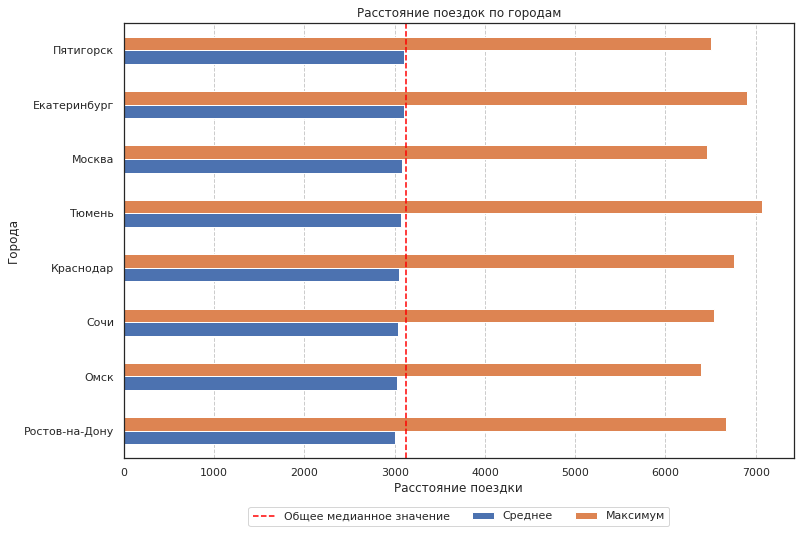

In [49]:
# выведем таблицу и график расстояний поездок по городам
title = 'Расстояние поездок по городам'
xlabel = 'Расстояние поездки'
ylabel = 'Города'
xgroup = 'city'
col_agg = 'distance'
kind='barh'
dist_dur_graph(df_megre(df_rides_go, df_users_go), xgroup=xgroup, col_agg=col_agg, title=title, kind=kind, xlabel=xlabel, ylabel=ylabel)

<a id="analis_data41"></a>
#### Выводы

   При анализе данных среднего расстояния поездки по городам выяснилось, что расстояние, которое проезжают пользователи, существенно никак не зависит от города. Отличие значений города с максимальным показателем среднего расстояния поездки (г.Пятигорск - 3107 метров) от города с минимальным показателем среднего расстояния поездки (г.Ростов-на-Дону - 2998 метра) составляет 105 метров или 3.5%.

<a id="analis_data5"></a>
### Продолжительность поездок

Выведем гистограмму распределения данных

,index,duration
0,count,17973.00
1,mean,17.90
2,std,5.98
3,min,2.04
4,25%,13.67
5,50%,17.71
6,75%,21.75
7,max,40.82


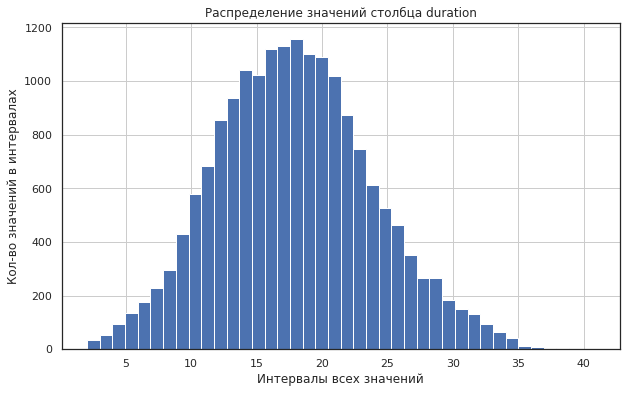

In [50]:
histogramm(df_megre(df_rides_go, df_users_go), column='duration', bins=40)

Рассчитаем время, которое тратят пользователи на поездку по разным городам

,city,mean,max
5,Ростов-на-Дону,17.72,35.90
6,Сочи,17.80,39.53
1,Краснодар,17.81,40.82
3,Омск,17.82,35.88
0,Екатеринбург,17.88,36.49
4,Пятигорск,17.99,39.87
7,Тюмень,18.05,38.13
2,Москва,18.16,36.40


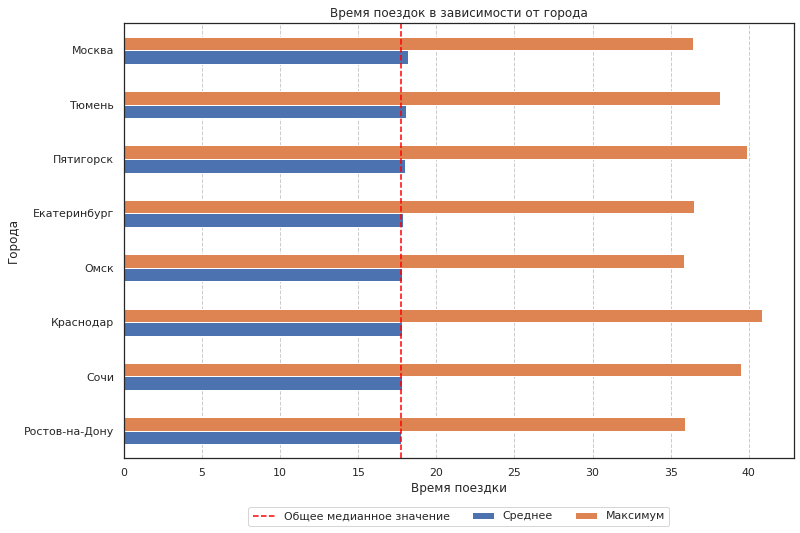

In [51]:
# выведем таблицу и график времени поездок по городам
title = 'Время поездок в зависимости от города'
xlabel = 'Время поездки'
ylabel = 'Города'
xgroup = 'city'
col_agg = 'duration'
kind='barh'
dist_dur_graph(df_megre(df_rides_go, df_users_go), xgroup=xgroup, col_agg=col_agg, title=title, kind=kind, xlabel=xlabel, ylabel=ylabel)

<a id="analis_data51"></a>
#### Выводы

Среднее время поездки всех пользователей составляет чуть меньше 18 минут. 50% времени поездок укладывается в диапазон от 13 до 22 минут.

Время поездки в разных городах существенно не отличается. Отличие значений города с максимальным показателем среднего времени поездки (г.Москва - 18 минут 9 секунд) от города с минимальным показателем среднего времени поездки (г.Ростов-на-Дону - 17 минут 43 секунды) минимально и составляет 26 секунд или 2.6%.

<a id="analis_data6"></a>
### Скорость поездок

,indicators,all,free,ultra
0,count,17973.00,11473.00,6500.00
1,mean,10.61,10.65,10.56
2,std,3.97,4.28,3.34
3,min,0.01,0.01,1.49
4,25%,8.11,8.00,8.27
5,50%,10.23,10.30,10.12
6,75%,12.87,13.06,12.53
7,max,25.39,25.39,21.79


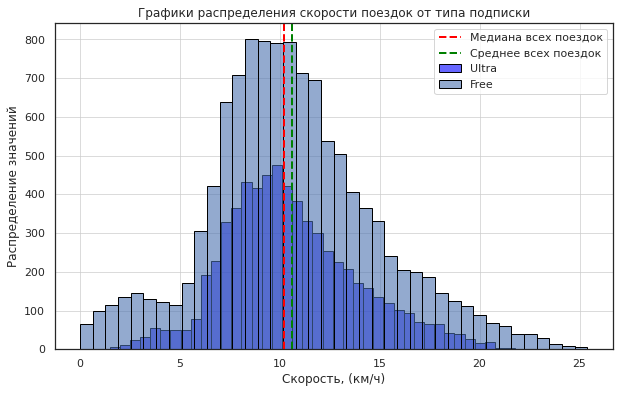

In [52]:
# выведем объединеную гистограмму и статистическую таблицу скорости поездок в зависимости от типа подписки
hist_dist_subscr(df_megre(df_rides_go, df_users_go), column='sp_kmh', bins=40)

,subscription_type,mean,max
1,ultra,10.56,21.79
0,free,10.65,25.39


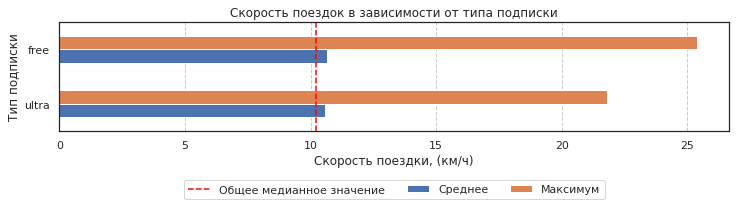

In [53]:
# построим график скорости поездок в зависимости от типа подписки
title = 'Скорость поездок в зависимости от типа подписки'
xlabel = 'Скорость поездки, (км/ч)'
ylabel = 'Тип подписки'
xgroup = 'subscription_type'
col_agg = 'sp_kmh'
kind='barh'
dist_dur_graph(df_megre(df_rides_go, df_users_go), xgroup=xgroup, col_agg=col_agg, title=title, kind=kind, xlabel=xlabel, ylabel=ylabel)

,city,mean,max
5,Ростов-на-Дону,10.46,25.39
3,Омск,10.53,23.84
2,Москва,10.54,24.85
7,Тюмень,10.58,24.25
1,Краснодар,10.60,24.56
6,Сочи,10.65,23.98
4,Пятигорск,10.76,25.14
0,Екатеринбург,10.77,25.17


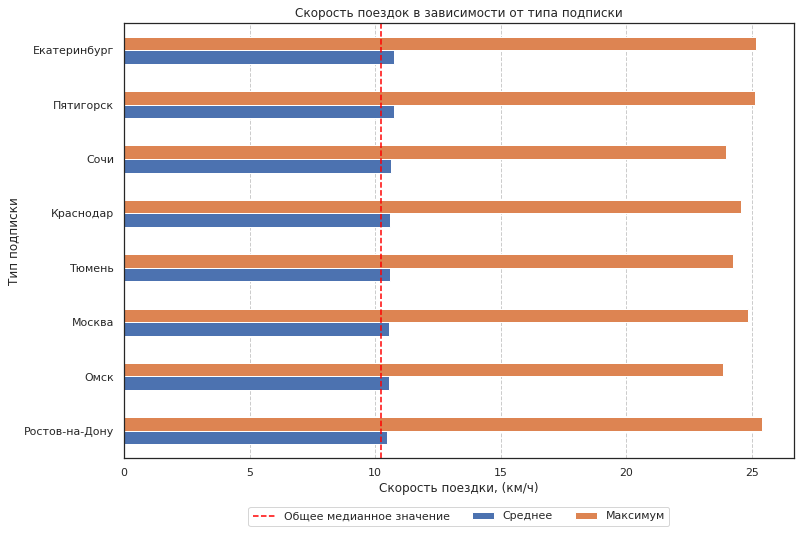

In [54]:
# построим график и таблицу скорости поездок в зависимости от города
title = 'Скорость поездок в зависимости от типа подписки'
xlabel = 'Скорость поездки, (км/ч)'
ylabel = 'Тип подписки'
xgroup = 'city'
col_agg = 'sp_kmh'
kind='barh'
dist_dur_graph(df_megre(df_rides_go, df_users_go), xgroup=xgroup, col_agg=col_agg, title=title, kind=kind, xlabel=xlabel, ylabel=ylabel)

<a id="analis_data61"></a>
#### Выводы

При анализе скорости поездок пользователей было выявлено, что средняя скорость поездки составляет 10,6 км/час. При этом средние скорости пользователей без подписки и пользователей с подпиской ultra правктичеси равны. 10,65 и 10,56 км/час соответственно. Разницы квартилей по скорости поездок между пользователями без подписки и подпиской ultra: -0,27(первый квартиль), +0,18(медианный квартиль), +0,53(третий квартиль). Из разницы квартилей мы видим, в нижней части распределения данных скорость по льзователей по подписке ultra выше, чем у пользователей без подписки. В верхней части распределения данных ситуация меняется, и там уже большую скорость показывают пользователи без подписки. При этом в верхней части рапспределения данных, разница в скорости более значительна.

Анализ по городам показал, что самая высокая средняя скорость поездок в Екатеринбурге(10,77 км/ч) а самая низкая в Ростове-на-дону(10,46 км/ч). В целом, можно сказать, что разница в скорости не зависит от города. Разница между минимальной и максимальной средней скоростью равна 0,3 км/ч или 2,8%

<a id="analis_data7"></a>
### Выводы по исследовательскому анализу данных

Проведя исследование данных, было установлено, что из восьми городов, где представлен сервис,  Пятигорск является лидером по количеству пользователей и количеству поездок, однако, занимает лишь шестое место по активности пользователей. Москва по всем трем параметрам уверенно занимает последнее место. Наиболее сбалансированными городами являются Ростов-на-Дону и Екатеринбург. Эти города входят в тройку лидеров как по количеству пользователей и количеству поездок, так и по активности пользователей.

При анализе данных пользователей по типу подписки мы выяснили, что чуть больше половины из всех пользователей предпочитают не оформлять подписку. Разница относительно не большая. В процентном отношении это 55% на 45%. Однако, данные в таблице и графике "Количество поездок по типу подписки", указывают на то, что разница между поездками, совершенными без подписки  и поездками по подписке ultra, увеличивается до 64% без подписки против 36% по подписке ultra. Что же касается типа подписок по городам, то здесь примечателен тот факт, что по количеству подписок ultra лидируют те города, которые были аутсайдерами в исследовании по количеству пользователей сервиса и количеству совершенных ими поездок. Выше всего  процентное отношение поездок по подписке ultra в Омске (40% от всех поездок в городе) и в Москве (37,6% от всех поездок в городе). И наоборот, лидер по числу пользователей и их активности, Пятигорск занимает последнее место по процентному отношению поездок по подписке ultra – 33,9% от всех поездок в городе.

При анализе данных расстояния поездки пользователями, было установлено, что среднее расстояние, которое преодолевают пользователи, составляет 3060 метров. Отличие значений города с максимальным показателем среднего расстояния поездки (г.Пятигорск - 3106 метров) от города с минимальным показателем среднего расстояния поездки (г.Ростов-на-Дону - 2998 метров) составляет 108 метров или 3.5%.

Анализ данных времени поездки показал, что среднее время поездки всех пользователей составляет чуть меньше 18 минут. При этом пользователи подписки ultra тратят на поездку в среднем на 1 минуту больше. Если среднее время, которое тратят пользователи без подписки на одну поездку, составляет  17 минут и 30 секунд, то пользователи по подписке ultra в среднем тратят на поездку время, равное 18 минутам и 30 секундам.   50% времени поездок укладывается в диапазон от 13 до 22 минут. Время поездки в разных городах существенно не отличается. Отличие значений города с максимальным показателем среднего времени поездки (г.Москва - 18 минут 9 секунд) от города с минимальным показателем среднего времени поездки (г.Ростов-на-Дону - 17 минут 43 секунды) составляет 26 секунд или 2.6%.

При анализе скорости поездок пользователей было выявлено, что средняя скорость поездки составляет 10,6 км/час. При этом средние скорости пользователей без подписки и пользователей с подпиской ultra правктичеси равны. 10,65 и 10,56 км/час соответственно. Анализ по городам показал, что самая высокая средняя скорость поездок в Екатеринбурге(10,7 км/ч) а самая низкая в Ростове-на-дону(10,4 км/ч). В целом, можно сказать, что разница в скорости не зависит от города. Разница между минимальной и максимальной средней скоростью равна 0,3 км/ч или 2,8%.

Проведя общий анализ возраста пользователей можно заключить, что наиболее активные, это пользователи, которым 25 лет (9,8% от всех поездок), 26 лет (9% от всех поездок) и 24 года (8,3% от всех поездок). Суммарно они составляют 27% от поездок всех пользователей. 


<a id="merge_data"></a>
## Объединение данных

Объедининим данные о пользователях, поездках и подписках

In [55]:
# для этого обратимся к функции df_megre
df_all_data = df_megre(df_rides_go, df_users_go)
# теперь объединим сводный датафрейм df_all_data с таблицей тарифов df_subscriptions_go
df_all_data = df_all_data.merge(df_subscriptions_go, on='subscription_type', how='left')
df_all_data.sample(5)

,index,user_id,distance,duration,date,month,name,age,city,subscription_type,type_age,sp_kmh,minute_price,start_ride_price,subscription_fee
6423,6423,691,2755.73,15.52,2021-02-13,2,Сергей,30,Сочи,ultra,20 до 35 лет,10.66,6,0,199
14875,14875,1313,3096.04,14.14,2021-03-20,3,Эвелина,21,Сочи,free,20 до 35 лет,13.13,8,50,0
1620,1620,174,2733.15,15.81,2021-12-23,12,Инна,28,Краснодар,ultra,20 до 35 лет,10.37,6,0,199
3448,3448,372,2533.93,28.20,2021-01-02,1,Арсен,26,Ростов-на-Дону,ultra,20 до 35 лет,5.39,6,0,199
17724,17724,1517,3178.35,11.58,2021-08-29,8,Давид,25,Тюмень,free,20 до 35 лет,16.47,8,50,0


 Теперь создадим еще два датафрейма с данными о пользователях без подписки и с данными о пользователях с подпиской.

In [56]:
# создадим датафрейм с данными пользователей без подписки
df_subscr_free = df_all_data.loc[df_all_data['subscription_type'] == 'free'].reset_index(drop=True)
df_subscr_free.sample(5)

,index,user_id,distance,duration,date,month,name,age,city,subscription_type,type_age,sp_kmh,minute_price,start_ride_price,subscription_fee
6992,13492,1214,3448.70,13.96,2021-01-27,1,Савелий,25,Ростов-на-Дону,free,20 до 35 лет,14.82,8,50,0
10100,16600,1434,2264.03,14.68,2021-11-09,11,Юрий,35,Тюмень,free,20 до 35 лет,9.25,8,50,0
5336,11836,1092,3831.08,23.90,2021-12-18,12,Ярослава,25,Ростов-на-Дону,free,20 до 35 лет,9.62,8,50,0
1806,8306,835,4202.92,22.96,2021-09-26,9,Эвелина,30,Москва,free,20 до 35 лет,10.98,8,50,0
9820,16320,1417,4480.60,30.20,2021-04-11,4,Мадина,31,Омск,free,20 до 35 лет,8.90,8,50,0


Выведем средние и максимальные значения расстояний по типу подписки

In [57]:
# создадим датафрейм с данными пользователей с подпиской
df_subscr_ultra = df_all_data.loc[df_all_data['subscription_type'] == 'ultra'].reset_index(drop=True)
df_subscr_ultra.sample(5)

,index,user_id,distance,duration,date,month,name,age,city,subscription_type,type_age,sp_kmh,minute_price,start_ride_price,subscription_fee
4783,4783,515,3934.04,25.11,2021-03-06,3,Руслан,23,Екатеринбург,ultra,20 до 35 лет,9.40,6,0,199
3472,3472,373,2472.84,11.73,2021-08-09,8,Даниэль,26,Тюмень,ultra,20 до 35 лет,12.65,6,0,199
6348,6348,681,4134.88,36.81,2021-05-01,5,Ярослава,30,Краснодар,ultra,20 до 35 лет,6.74,6,0,199
2820,2820,301,3277.48,11.94,2021-11-30,11,Вячеслав,24,Ростов-на-Дону,ultra,20 до 35 лет,16.47,6,0,199
4317,4317,465,3327.69,17.51,2021-02-20,2,Егор,25,Пятигорск,ultra,20 до 35 лет,11.40,6,0,199


<a id="analis_dist_subscr"></a>
Рассчитаем расстояние, которое проезжают пользователи по типу подписки

,indicators,all,free,ultra
0,count,17973.00,11473.00,6500.00
1,mean,3059.86,3028.37,3115.45
2,std,1108.81,1235.54,836.90
3,min,0.86,0.86,244.21
4,25%,2538.84,2360.88,2785.44
5,50%,3129.03,3102.08,3148.64
6,75%,3762.64,3883.98,3560.57
7,max,7066.00,7066.00,5699.77


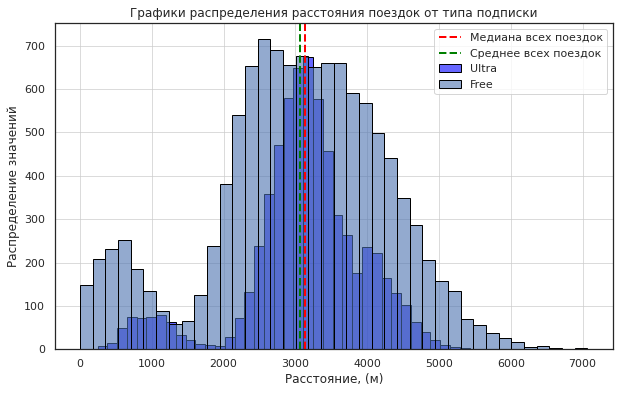

In [58]:
# выведем объединенную гистограмму и таблицу статистических данных расстояний поездок по типу подписки
hist_dist_subscr(df_megre(df_rides_go, df_users_go), column='distance', bins=40)

Выведем средние и максимальные значения расстояний по типу подписки

,subscription_type,mean,max
0,free,3028.37,7066.00
1,ultra,3115.45,5699.77


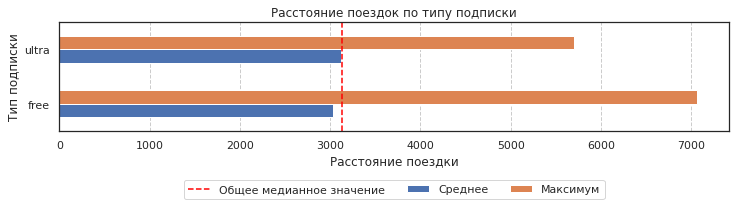

In [59]:
# выведем таблицу и график расстояний поездок по типу подписок
title = 'Расстояние поездок по типу подписки'
xlabel = 'Расстояние поездки'
ylabel = 'Тип подписки'
xgroup = 'subscription_type'
col_agg = 'distance'
kind='barh'
dist_dur_graph(df_all_data, xgroup=xgroup, col_agg=col_agg, title=title, kind=kind, xlabel=xlabel, ylabel=ylabel)

<a id="analis_durat_subscr"></a>
Рассчитаем время, которое тратят пользователи на поездку по типу подписки

,indicators,all,free,ultra
0,count,17973.00,11473.00,6500.00
1,mean,17.90,17.53,18.54
2,std,5.98,6.16,5.57
3,min,2.04,2.04,3.76
4,25%,13.67,13.09,14.52
5,50%,17.71,17.38,18.18
6,75%,21.75,21.64,21.88
7,max,40.82,34.95,40.82


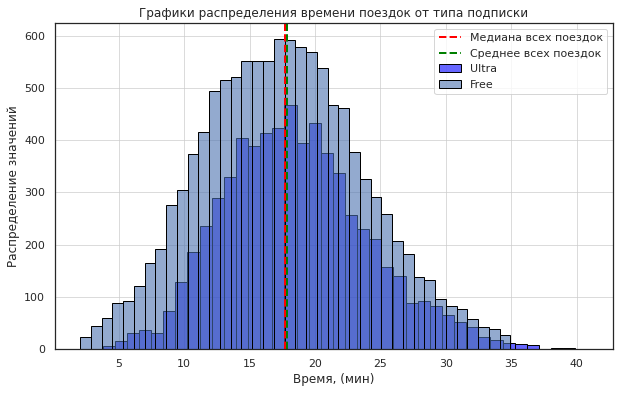

In [60]:
# выведем объединенную гистограмму и таблицу статистических данных времени поездок по типу подписки
hist_dist_subscr(df_all_data, column='duration', bins=40)

,subscription_type,mean,max
0,free,17.53,34.95
1,ultra,18.54,40.82


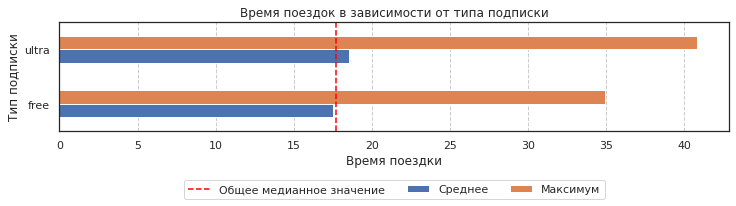

In [61]:
# построим график времени поездок в зависимости от типа подписки
title = 'Время поездок в зависимости от типа подписки'
xlabel = 'Время поездки'
ylabel = 'Тип подписки'
xgroup = 'subscription_type'
col_agg = 'duration'
kind='barh'
dist_dur_graph(df_all_data, xgroup=xgroup, col_agg=col_agg, title=title, kind=kind, xlabel=xlabel, ylabel=ylabel)

<a id="merge_data1"></a>
#### Выводы

Среднее расстояние, которое проезжают пользователи без подписки, составляет  3028 метров, а пользователи по подписке ultra в среднем проезжают расстояние, равное 3115 метров. Из таблицы статистических данных по расстоянию в зависимости от типа подписки мы видим, что стандартное отклонение значительно выше у пользователей без подписки, что говорит о большем разбросе данных или, иными словами, имеют больший диапазон расстояний поездок. 50% расстояний поездок пользователей без подписки сосредоточено в диапазоне от 2361 до 3884 метра с разницей в 1523 метра, тогда как 50% расстояний поездок пользователей с подпиской ultra сосредоточено в диапазоне от 2785 до 3560 метра с разницей всего около 775 метров. Так же интересно посмотреть на разницы квартилей между пользователями без подписки и подпиской ultra: -515(первый квартиль), -46(медианный квартиль), +324(третий квартиль). Из разницы квартилей мы можем заключить, что более значительная разница в расстоянии поездкок по типу подписок заключается в расстояниях до медианного квартиля всех поездок. С большой долей вероятности этим и объясняется разница между средним расстоянием всех поездок пользователей (3060 метров) от медианного значения, которое равно 3129 метрам. Совмещенная гистограмма расстояний по типу подписки визуально подтверждает эти выводы.

По типу подписки заметна разница времени поездки. Пользователи подписки ultra тратят на поездку в среднем на 1 минуту больше. Это так же подтверждается и гистограммами с таблицей. 50% времени поездок пользователей без подписки сосредоточено в диапазоне от 13 минут до 21 минуты 30 секунд с интервалом в 8 минут 30 секунд, тогда как 50% времени поездок пользователей с подпиской ultra сосредоточено в диапазоне от 14 минут 30 секунд до 22 минут с интервалом в 7 минут 30 секунд.

<a id="calc_reven"></a>
## Подсчёт выручки

Рассчитаем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Затем рассчитаем помесячную выручку по каждому пользователю 

In [62]:
# проведем округление в большую сторону столбца 'duration'
df_all_data['duration'] = np.ceil(df_all_data['duration'])
# создадим датафрейм для рассчета выручки
df_user_revenue = (
    df_all_data.groupby(['user_id', 'month'])    # группируем по пользователю и месяцу
                           .agg(    # аггрегируем данные
                               name=('name', 'first'),
                               age=('age', 'first'),
                               city=('city', 'first'),
                               sum_dist=('distance', 'sum'),
                               cnt_trips=('user_id', 'count'),
                               all_time=('duration', 'sum'),
                               subscription_type=('subscription_type', 'first'),
                               minute_price=('minute_price', 'first'),
                               start_ride_price=('start_ride_price', 'first'),
                               subscription_fee=('subscription_fee', 'first')
                           )).reset_index()

# теперь рассчитаем помесячную выручку от каждого пользователя
df_user_revenue['revenue']=  (df_user_revenue['all_time'] * df_user_revenue['minute_price'] 
                              + df_user_revenue['cnt_trips'] *  df_user_revenue['start_ride_price']
                              + df_user_revenue['subscription_fee'])

# выведем таблицу на экран
df_user_revenue.sample(5)

,user_id,month,name,age,city,sum_dist,cnt_trips,all_time,subscription_type,minute_price,start_ride_price,subscription_fee,revenue
3894,595,9,Виолетта,24,Сочи,4673.52,1,23.00,ultra,6,0,199,337.00
2275,349,12,Федор,25,Сочи,2486.24,1,23.00,ultra,6,0,199,337.00
8004,1131,9,Антон,26,Тюмень,6701.47,2,46.00,free,8,50,0,468.00
7678,1092,3,Ярослава,25,Ростов-на-Дону,3682.48,1,28.00,free,8,50,0,274.00
1784,272,4,Любовь,21,Омск,2254.27,1,16.00,ultra,6,0,199,295.00


In [63]:
# выведем суммарную выручку сервиса
print(f"Суммарная выручка сервиса составила {df_user_revenue['revenue'].sum()} руб.")

Суммарная выручка сервиса составила 3873131.0 руб.


,index,revenue
0,count,11300.00
1,mean,342.75
2,std,153.32
3,min,74.00
4,25%,234.00
5,50%,319.00
6,75%,415.00
7,max,1444.00


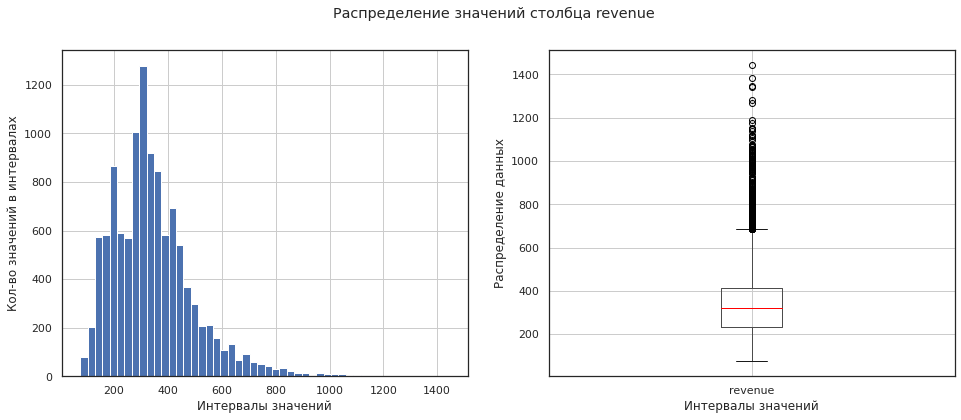

In [64]:
# посмотрим на графики распределения данных
histogram_boxplot_graph(df_user_revenue, 'revenue', bins=50, descr=True)

In [65]:
# выведем данные выручки по городам
(
    df_user_revenue.groupby('city')['revenue'].sum()
    .reset_index().assign(perc=lambda x: (x['revenue'] / x['revenue'].sum()) * 100)
    .sort_values('revenue', ascending=False)
)

,city,revenue,perc
4,Пятигорск,539948.00,13.94
0,Екатеринбург,529469.00,13.67
5,Ростов-на-Дону,519342.00,13.41
1,Краснодар,488865.00,12.62
6,Сочи,480699.00,12.41
7,Тюмень,458093.00,11.83
3,Омск,448778.00,11.59
2,Москва,407937.00,10.53


In [66]:
# выведем данные выручки по типу подписки
(
    df_user_revenue.groupby('subscription_type')['revenue'].sum()
    .reset_index().assign(perc=lambda x: (x['revenue'] / x['revenue'].sum()) * 100)
    .sort_values('revenue', ascending=False)
)

,subscription_type,revenue,perc
0,free,2228594.00,57.54
1,ultra,1644537.00,42.46


Расчитаем сколько за 1 минуту суммарно платят пользователи по подписке ultra и без подписки

In [67]:
df_user_revenue.groupby('subscription_type').agg(
    st_sum_dur=('all_time', 'sum'),
    st_sum_rev=('revenue', 'sum')
).reset_index().assign(rub_min=(lambda x: x['st_sum_rev'] / x['st_sum_dur']))

,subscription_type,st_sum_dur,st_sum_rev,rub_min
0,free,206868.00,2228594.00,10.77
1,ultra,123745.00,1644537.00,13.29


<a id="calc_reven1"></a>
### Выводы

Суммарная выручка сервиса за анализируемый период составила 3873131 рубль. Среднее значение выручки отодного пользователя (342.75 руб) сущестсвенно отличается от медианного (319 руб). На диаграмме размаха мы видим большое количечство выбросов в бОльшую сторону, которые тянут показатель среднего значения в сторону увеличения.

Выручка по городам показала, что наибольшая выручка 539948 рублей или 13.9% от всей выручки была в Пятигорске, а наименьшая в Москве и составила 407937 рублей, это 10.5% от выручки по всем городам.

Наибольшую выручку по типу подписки показали пользователи подписки ultra. Суммарная выручка от них составила 2228594 рубля, что составило 57.5% от всей выручки. Выручка от пользователей без подписки составила 1644537 рублей, что эквивалентно 42.5% от всей выручки.

Так же мы узнали, что пользователи с подпиской ultra более выгодна для сервиса. Суммарная стоимость минуты аренды самоката для пользователей с подпиской ultra обходится им в 13.29 рублей против 10.77 рубля с пользователей, которые предпочитают ездить без подписки.

<a id="check_hypot"></a>
## Проверка гипотез

<a id="check_hypot1"></a>
### Пользователи с подпиской тратят больше времени на поездки

Проверим гипотезу, что пользователи с подпиской тратят больше вревени на поездки.


**Гипотеза H0:** среднее время поездки пользователи с подпиской ultra равно среднему времени поездки пользователей без подписки.

**Гипотеза H1:** среднее время поездки пользователи с подпиской ultra больше среднего времени поездки пользователей без подписки.

In [68]:
# выполним t-тест. Используем параметр 'greater' для правосторонней альтернативной гипотезы
result = st.ttest_ind(df_subscr_ultra['duration'], df_subscr_free['duration'], alternative='greater')
# вызовем функцию отвержения гипотезы
p_value(result)

р-значение равно 4.704468074453899e-28, отвергаем нулевую теорию.


In [69]:
# проверим наш тест с округлением до 2 знаков после запятой
print(f"Среднее время одной поездки по подписке ultra равно {df_subscr_ultra['duration'].mean().round(2)} минут.")
print(f"Среднее время одной поездки по подписке free равно {df_subscr_free['duration'].mean().round(2)} минут.")

Среднее время одной поездки по подписке ultra равно 18.54 минут.
Среднее время одной поездки по подписке free равно 17.53 минут.


**Вывод:** Значение p-value близко к нулю. Есть основания полагать, что пользователи с подпиской ultra в среднем тратят на поездку больше времени, чем пользователи без подписки. Рассчет среднего значения времени поездки пользователей по подписке ultra подтвердил правильность оценки гипотезы.

<a id="check_hypot1"></a>
### Пользователи с подпиской за одну поездку проезжают расстояние, превышающее рекомендуемое расстояние для самоката

Оптимальное, с точки зрения износа самоката, расстояние за одну поездку равняется 3130 метров. Проверим гипотезу, что пользователи с подпиской за одну поездку проезжают расстояние, превышающее рекомендуемое расстояние для самоката.

**Гипотеза H0:** среднее расстояние поездки пользователей с подпиской ultra равно 3130 метров.

**Гипотеза H1:** среднее расстояние поездки пользователей с подпиской ultra больше 3130 метров.

In [70]:
# зададим оптимальное расстояние
opt_dist = 3130
# выполним t-тест. Используем параметр 'greater' для правосторонней альтернативной гипотезы
result = st.ttest_1samp(df_subscr_ultra['distance'], opt_dist, alternative='greater')
p_value(result)


р-значение равно 0.9195368847849785, не отвергаем нулевую теорию.


In [71]:
# проверим наш тест с округлением до 2 знаков после запятой  
print(f"Среднее расстояние одной поездки по подписке ultra равно {df_subscr_ultra['distance'].mean().round(2)} метров.")

Среднее расстояние одной поездки по подписке ultra равно 3115.45 метров.


**Вывод:** Значение p-value больше 5% порога значимости. Есть основания полагать, что пользователи с подпиской ultra проезжают в среднем расстояние меньше 3130 метров. Рассчет среднего значения поездки пользователей по подписке ultra подтвердил правильность оценки гипотезы.

<a id="check_hypot3"></a>
### Помесячная выручка выше от пользователей с подпиской чем выручка  от пользовтелей без подписки

Проверим гипотезу, что помесячная выручка выше от пользователей с подпиской чем выручка от пользовтелей без подписки

**Гипотеза H0:** помесячная выручка пользователей с подпиской ultra равна помесячной выручке пользователей без подрписки.

**Гипотеза H1:** помесячная выручка пользователей с подпиской ultra больше помесячной выручки пользователей без подрписки.

In [72]:
# выполним t-тест. Используем параметр 'greater' для правосторонней альтернативной гипотезы
result = st.ttest_ind(df_user_revenue.loc[df_user_revenue['subscription_type'] == 'ultra', 'revenue'], 
                      df_user_revenue.loc[df_user_revenue['subscription_type'] == 'free', 'revenue'], alternative='greater')
# вызовем функцию отвержения гипотезы
p_value(result)

р-значение равно 2.0314113674863288e-30, отвергаем нулевую теорию.


In [73]:
# проверим наш тест с округлением до 2 знаков после запятой
print(f"Средняя помесячная выручка от пользователей по подписке ultra равна {df_user_revenue.loc[df_user_revenue['subscription_type'] == 'ultra', 'revenue'].mean().round(2)} рубль.")
print(f"Средняя помесячная выручка от пользователей без подписки равна {df_user_revenue.loc[df_user_revenue['subscription_type'] == 'free', 'revenue'].mean().round(2)} рублей.")

Средняя помесячная выручка от пользователей по подписке ultra равна 362.79 рубль.
Средняя помесячная выручка от пользователей без подписки равна 329.33 рублей.


**Вывод:** Значение p-value близко к нулю. Есть основания полагать, что помесячная выручка от пользователей с подпиской ultra больше, чем от пользователей без подписки. Рассчет среднего значения помесячной подписки двух групп рользователей подтвердил правильность оценки гипотезы.

<a id="check_hypot4"></a>
### После обновления серверов компании, количество обращений в техподдержку ощутимо снизится

**Представьте такую ситуацию:** техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. **Вопрос:** Какой тест вам понадобился бы для проверки этой гипотезы?

**Ответ:** у нас есть два набора данных. Первый набор, это количество обращений пользователей до технического обслуживания серверов. И второй набор - количество обращений пользователей после проведения технического обслуживания серверов. В этих наборах данных мы определяем поведение пользователей, как единого целого. В ситуации, когда мы хотим проверить изменение поведения какого-либо объекта (в данном случае пользователей), нужно использовать парный t-тест. В python, это метод scipy.stats.ttest_rel(). Но важно помнить, что t-тест можно проводить при нормальном распределении в обоих наборах данных. Это необходимо для правильной интерпретации данных

<a id="check_hypot5"></a>
### Выводы

Гипотеза о том, что **пользователи с подпиской ultra тратят больше времени на поездки, чем пользователи без подписки** не была отвергнута. Поэтому, есть основания предполагать, что пользователи с подпиской ultra в среднем тратят на поездку больше времени, чем пользователи без подписки. Рассчет среднего значения времени поездки пользователей по подписке ultra подтвердил правильность оценки гипотезы.

Гипотеза о том, что **пользователи с подпиской ultra за одну поездку проезжают расстояние, превышающее рекомендуемое расстояние для самоката (3130 метров)** была отвергнута. Рассчет среднего значения поездки пользователей по подписке ultra подтвердил правильность оценки гипотезы.

Гипотеза о том, что **помесячная выручка от пользователей с подпиской ultra равна или меньше выручки от пользовтелей без подписки** была отвергнута. Поэтому есть основания полагать, что помесячная выручка от пользователей с подпиской ultra больше, чем от пользователей без подписки. Рассчет среднего значения помесячной подписки двух групп рользователей подтвердил правильность оценки гипотезы.

<a id="raspr"></a>
## Распределения

<a id="raspr1"></a>
### Количество промокодов во время проведения акции

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10% пользователей. Необходимо выяснить, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%. 

Подберем параметры распределения, описывающего эту ситуацию, построим график распределения и сформируем ответ на вопрос о количестве промокодов.

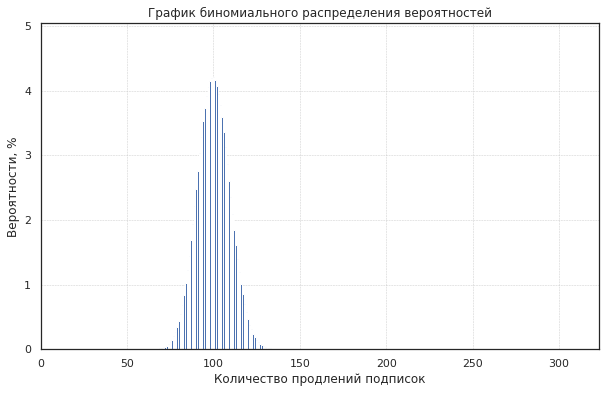

Для того, чтобы вероятность не выполнения плана была максимум 5%, необходимо раздать 1161 промокод.


In [74]:
# определлим входные данные
p = .1 # вероятность продления подписки по промокоду 10%
n = 1000 # 100 клиентов должны продлить подписку. Эффект от промокодов 10%. Разумно раздать 1000 промокодов
k = 100 # необходимое количество продлений подписок
bnm = .05 # максимально допустимая вероятность не выполнения плана
val_prb = []
val_n = []
# вычислим биномиальное распределение вероятностей
for i in range(0, n + 1):
    choose = np.math.factorial(n) / (np.math.factorial(i) * np.math.factorial(n - i))
    prob = choose * p**i * (1 - p)**(n - i)
    # пропускаем значения, где вероятность равна 0
    if prob > 0:
        val_prb.append(prob * 100)
        val_n.append(i)
# построим график
plt.figure(figsize=(10, 6))
plt.bar(val_n, val_prb)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
# для удобства восприятия, ограничим график минимальным и максимальным значениями по осям
plt.ylim(min(val_prb), max(val_prb) * 1.2)
plt.xlim(min(val_n), max(val_n))
plt.xlabel('Количество продлений подписок')
plt.ylabel('Вероятности, %')
plt.title('График биномиального распределения вероятностей')
plt.show()
# определим необходимое количество промокодов
while bnm < binom.cdf(k - 1, n, p):
    n +=1
print(f'Для того, чтобы вероятность не выполнения плана была максимум {int(bnm * 100)}%, необходимо раздать {n} промокод.')

<a id="raspr11"></a>
#### Вывод

Для проведения акции с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку, необходимо раздать не менее 1161 промокода. Данное количество розданных промокодов позвалит достичь поставленной цели с вероятностью 95%.

<a id="raspr2"></a>
### оценка вероятности того, что из 1 млн. разосланных push-уведомлений, его откроют не более 399.5 тыс. пользователей

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. 

С помощью аппроксимации построим примерный график распределения и оценим вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

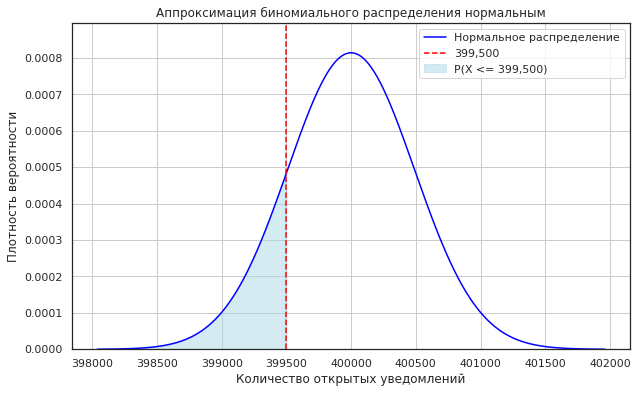

Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей составляет 15.37%


In [75]:
# определим входные данные
n = 1000000  # количество отправленных уведомлений
p = 0.4    # вероятность того, что уведомление будет открыто
mu = n * p    # математическое ожидание
sigma = np.sqrt(n * p * (1 - p))    # стандартное отклонение

# построим график
plt.figure(figsize=(10, 6))
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)    # диапазон значений по оси X
y = norm.pdf(x, mu, sigma)    # диапазон значений по оси Y
plt.ylim(0, max(y) * 1.1)
plt.plot(x, y, label='Нормальное распределение', color='blue')
plt.fill_between(x, y, where=(x <= 399500), color='lightblue', alpha=0.5, label='P(X <= 399,500)')
plt.title('Аппроксимация биномиального распределения нормальным')
plt.xlabel('Количество открытых уведомлений')
plt.ylabel('Плотность вероятности')
plt.axvline(399500, color='red', linestyle='--', label='399,500')
plt.legend()
plt.grid()
plt.show()

# найдем вероятность того, что уведомление откроют не более 399,5 тыс. пользователей
z_val = (399500 - mu) / sigma
prblt = norm.cdf(z_val)
print(f'Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей составляет {round(prblt * 100, 2)}%')

<a id="raspr21"></a>
#### Вывод

После рассылки отделом маркетинга клиентам 1 млн push-уведомлений в мобильном приложении, вероятность того, что уведомления откроют не более 399,5 тыс. клиентов, составляет не более 15.4%

<a id="conclusion_project"></a>
## Общий вывод по исследованию

Проведя исследование данных сервиса аренды самокатов GoFast, было установлено, что из восьми городов, где представлен сервис, Пятигорск является лидером по количеству пользователей и количеству поездок, однако, занимает лишь шестое место по активности пользователей. Москва по всем трем параметрам уверенно занимает последнее место. Наиболее сбалансированными городами являются Ростов-на-Дону и Екатеринбург. Эти города входят в тройку лидеров как по количеству пользователей и количеству поездок, так и по активности пользователей.

При анализе данных пользователей по типу подписки мы выяснили, что чуть больше половины из всех пользователей предпочитают не оформлять подписку. Разница относительно не большая. В процентном отношении это 55% на 45%. Но при этом разница между поездками, совершенными без подписки и поездками по подписке ultra, увеличивается до 64% без подписки против 36% по подписке ultra. Что же касается типа подписок по городам, то здесь примечателен тот факт, что по количеству подписок ultra лидируют те города, которые были аутсайдерами в исследовании по количеству пользователей сервиса и количеству совершенных ими поездок. Выше всего процентное отношение поездок по подписке ultra в Омске (40% от всех поездок в городе) и в Москве (37,6% от всех поездок в городе). И наоборот, лидер по числу пользователей и их активности, Пятигорск занимает последнее место по процентному отношению поездок по подписке ultra – 33,9% от всех поездок в городе.

При анализе данных расстояния поездки пользователями, было установлено, что среднее расстояние, которое преодолевают пользователи, составляет 3060 метров. Среднее расстояние, которое проезжают пользователи без подписки, составляет 3028 метров, а пользователи по подписке ultra в среднем проезжают расстояние, равное 3115 метров. При этом пользователи без подписки имеют существенно больший диапазон расстояний поездок. 50% расстояний поездок пользователей без подписки сосредоточено в диапазоне от 2361 до 3884 метра с разницей в 1523 метра. Тогда как 50% расстояний поездок пользователей с подпиской ultra сосредоточено в диапазоне от 2785 до 3560 метра с разницей всего около 775 метров. Анализ данных среднего расстояния поездки по городам показал, что расстояние существенно не зависит от города. Отличие значений города с максимальным показателем среднего расстояния поездки (Пятигорск - 3106 метров) от города с минимальным показателем среднего расстояния поездки (Ростов-на-Дону - 2998 метра) составляет 108 метров или 3.5%.

Анализ данных времени поездки показал, что среднее время поездки всех пользователей составляет чуть меньше 18 минут. При этом пользователи подписки ultra тратят на поездку в среднем на 1 минуту больше. Если среднее время, которое тратят пользователи без подписки на одну поездку, составляет 17 минут и 30 секунд, то пользователи по подписке ultra в среднем тратят на поездку время, равное 18 минутам и 30 секундам. 50% времени поездок укладывается в диапазон от 13 до 22 минут. Время поездки в разных городах существенно не отличается. Отличие значений города с максимальным показателем среднего времени поездки (г.Москва - 18 минут 9 секунд) от города с минимальным показателем среднего времени поездки (г.Ростов-на-Дону - 17 минут 43 секунды) составляет 26 секунд или 2.6%.

При анализе скорости поездок пользователей было выявлено, что средняя скорость поездки составляет 10,6 км/час. При этом средние скорости пользователей без подписки и пользователей с подпиской ultra правктичеси равны. 10,65 и 10,56 км/час соответственно. Анализ по городам показал, что самая высокая средняя скорость поездок в Екатеринбурге(10,8 км/ч) а самая низкая в Ростове-на-дону(10,5 км/ч). В целом, можно сказать, что разница в скорости не зависит от города. Разница между минимальной и максимальной средней скоростью равна 0,3 км/ч или 2,8%.

Проведя общий анализ возраста пользователей можно заключить, что наиболее активные, это пользователи, которым 25 лет (9,8% от всех поездок), 26 лет (9% от всех поездок) и 24 года (8,3% от всех поездок). Суммарно они составляют 27% от поездок всех пользователей.

Суммарная выручка сервиса за анализируемый период составила 3873131 рубль. Выручка по городам показала, что наибольшая выручка 539948 рублей или 13.9% от всей выручки была в Пятигорске, а наименьшая в Москве и составила 407937 рублей, это 10.5% от выручки по всем городам. Наибольшую выручку по типу подписки показали пользователи подписки ultra. Суммарная выручка от них составила 2228594 рубля, что составило 57.5% от всей выручки. Выручка от пользователей без подписки составила 1634018 рублей, что эквивалентно 42.5% от всей выручки. Так же мы выяснили, что пользователи с подпиской ultra более выгодны для сервиса. Суммарная стоимость минуты аренды самоката для пользователей с подпиской ultra обходится им в 13.29 рублей против 10.77 рубля с пользователей, которые предпочитают ездить без подписки.


Рекомендации по результатам исследования.

 * **Для отдела маркетинга.** Обратить внимание на город Краснодар. Этот город обладает наибольшим потенциалом для увеличения подписчиков ultra. Город занимает 4-е место по количеству совершенных пользователями поездок. 8 место по доле подписок ultra, и 6 место по среднему расстоянию одной поездки. Так же следует обратить внимание на город Омск. Этот город обладает потенциалом для развития общего количества подписчиков. Омск занимает 6 место по количеству пользователей и 7 место по количеству поездок. При этом по доле подписок ultra он находится на 2 месте, и на 7 месте по среднему расстоянию одной поездки.

 * **Для It-отдела.** В переданных для анализа данных содержались дубликаты уникальных значений user_id. Это могло произойти либо в результате некорректной выгрузки данных, либо в результате отсутствия проверки вводимых данных на уникальность. Рекомендуется проверить и убедиться в том, что валидация уникальности данных работает должным образом. Если она отсутствует, то рекомендуется  добавить контроль уникальности ввода данных по user_id. Отсутствие проверки на уникальность, это достаточно серьезное упущение, которое впоследствии может привести к снижению производительности базы данных и потере их целостности.
 
Так же, во время предобработки данных, были обнаружены 95 поездок с одинаковым временем 30 секунд и расстоянием от 4000 до 6000 метров. Необходимо уточнить у коллег причину появления этих строк. Сбой это, или какая-то акция с разадчами промокодов.